<div style="text-align: center;">
    <h1 style="color:black;" > ANEMIA EN NIÑOS ENTRE 6 Y 36 MESES EN EL PERÚ <a id="indice"></a> </h1>
</div>

<h1 style="color:black;" > Importación de librerías <a id="1"></a> </h1>

Se importan las librerías necesarias:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

!pip install missingno
import missingno
!pip install upsetplot pyjanitor==0.23.1
import upsetplot
import janitor
import scipy.stats

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!pip install tensorflow
!pip install visualkeras
import visualkeras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

<div style="text-align: left; margin-top: 2rem;">
  <button style="padding: 10px 20px; font-size: 12px; cursor: pointer; background-color: #f0f0f0; color: white; border: none;">
    <a href="#indice" style="color: black; text-decoration: none;">Regresar Tabla de contenido</a><br>
  </button>
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1 style="color:black;" > Extracción de datos <a id="3"></a> </h1>

Accedemos y leemos el archivo que está almacenado en nuestro entorno de trabajo, el cual contiene el conjunto de datos:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Proyecto/datos_limpios.csv')

In [ ]:
df.head()

,n_personas_hogar,n_niños_menores_cinco,área_residencia,lugar_residencia,fuente_agua_para_beber,piso_vivienda,índice_riqueza,puntuación_índice_riqueza,seguro_salud_essalud/ipss,seguro_salud_militar,seguro_salud_integral,seguro_salud_compañía_seguros,seguro_salud_seguro_privado,seguro_salud_no_tiene,n_meses_lactancia,lugar_parto,tamaño_niño_al_nacer,n_veces_comida_sólida_semisólida_día_anterior,niño_afiliado_sis,durante_embarazo_diagnóstico_anemia,diarrea_últimas_dos_semanas,fiebre_últimas_dos_semanas,tos_últimas_dos_semanas,suplemento_vitamina_a_reciente,antiparasitarios_últimos_seis_meses,peso_kg,talla_cm,nivel_hemoglobina_ajustada_g/dl,nivel_anemia,hierro_jarabe_última_semana,hierro_polvo_micronutrientes_última_semana,hierro_gotas_última_semana,hierro_otro_última_semana,edad_meses,sexo_niños,nivel_educativo_madre,n_orden_nacimiento,b_té_café,b_leche_materna_refrigerada_conservada,b_leche_polvo_nam_s26_similac,b_otra_leche_fresca_evaporada_polvo,f_naranjas_mandarina_lima_maracuyá_toronja,f_secas,harina_pan_fideos_galletas_otra_comida_con_cereales,papa_yuca_olluco_oca_mashua,huevos,res_pollo_pescado_mariscos_otrascarnes_hígado_mondongo_otrasvísceras,v_camote_zanahorias_zapallo,v_hoja_verdeoscuro_espinaca_acelga_otros,f_mango_papaya_aguaje_otrasfrutas_vitamina_a,f_plátano_isla_seda_maduro_manzana_palta_otras,habas_frijol_lenteja_soya_pallares_garbanzo_arvejas,queso_yogurt_otros_lácteos,comida_hecha_aceite_grasas_mantequilla,nivel_educativo_esposo_compañero_merge5,actualmente_trabajando,nivel_educativo_esposo_compañero_2,violencia_emocional,violencia_física_menos_severa,violencia_física_severa,violencia_sexual,edad_madre,imc_madre,actualmente_embarazada,nivel_hemoglobina_ajustada_g/dl_madre,nivel_anemia_madre,región_natural,n_veces_lavado_manos,lavado_manos_después_baño,lavado_manos_después_pañales,lavado_manos_antes_preparar_comida,lavado_manos_antes_alimentar_niño,persona_alimenta_niño,nivel_educativo_esposo_compañero_REC91_22,preparación_alimentos_minsa_último_año,n_veces_preparación_alimentos_minsa_último_año,visita_minsa_alimentación_último_año,n_veces_visita_minsa_alimentación_último_año,seguro_salud_público,seguro_salud_privado,amamantamiento,amamantamiento2,pobreza,fuente_agua,material_piso,tamaño_hogar,menores_cinco_años,edad_niño,edad_niño2,orden_nacimiento,orden_nacimiento2,edad_madre2,edad_madre3,parto_institución_salud,consumo_leche,productos_lácteos,frutas,diversidad_dietética,diversidad_dietética2,hierro_última_semana,anemia
0,3.0,1.0,1.0,1.0,11,33,5,1.469055,0.0,1.0,0.0,0.0,0.0,0.0,12.0,31.0,2.0,4,0.0,2,0,0,2,0,1,15.8,94.1,11.6,4,2,2,2,2,31.0,1.0,3.0,1.0,1,0,1,0,1,0,1,1,1,1,0,0,1,1,1,0,1,3,0.0,5,0,0,0,0,22.0,2636.0,0.0,12.3,4.0,3.0,4,1,0,1,1,1,3,2,0.0,2,0.0,1.0,0.0,1,2,0,1,1,0,0,2,4,1,0,0,0,1,1,1,1,6,1,0,0
1,4.0,1.0,1.0,1.0,11,34,3,0.484814,0.0,0.0,1.0,0.0,0.0,0.0,22.0,21.0,2.0,4,1.0,2,0,0,0,1,0,12.2,86.0,12.4,4,2,2,2,2,28.0,1.0,2.0,3.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,3,1.0,5,1,0,0,0,34.0,3065.0,0.0,15.0,4.0,3.0,4,1,0,0,0,1,3,2,0.0,2,0.0,1.0,0.0,1,2,0,1,1,0,0,2,3,3,1,2,1,1,1,1,1,4,1,0,0
2,3.0,1.0,1.0,1.0,11,34,4,0.947885,1.0,0.0,0.0,0.0,0.0,0.0,16.0,22.0,3.0,4,0.0,2,0,1,2,0,1,12.6,94.0,11.7,4,2,2,2,2,33.0,2.0,3.0,1.0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,1,3,1.0,5,0,0,0,0,32.0,2239.0,0.0,12.6,4.0,3.0,4,1,0,1,0,1,4,2,0.0,2,0.0,1.0,0.0,1,2,0,1,1,0,0,2,4,1,0,2,1,1,1,1,1,6,1,0,0
3,5.0,1.0,1.0,1.0,11,34,2,0.214832,0.0,0.0,1.0,0.0,0.0,0.0,6.0,21.0,3.0,3,1.0,2,0,0,0,0,0,8.3,65.6,10.4,3,2,2,1,2,6.0,1.0,2.0,1.0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,2,1.0,4,0,0,0,0,31.0,2476.0,0.0,14.5,4.0,3.0,4,1,1,1,0,1,2,2,0.0,2,0.0,1.0,0.0,2,3,1,1,1,1,0,0,0,1,0,2,1,1,0,0,1,6,1,1,1
4,4.0,1.0,1.0,1.0,11,34,4,0.956133,1.0,0.0,0.0,0.0,0.0,0.0,14.0,22.0,3.0,5,0.0,2,0,0,0,0,0,12.3,81.3,11.4,4,2,2,2,2,18.0,1.0,3.0,2.0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,1,2,1.0,4,0,1,0,0,33.0,2810.0,0.0,13.9,4.0,3.0,4,1,0,1,0,1,2,2,0.0,2,0.0,1.0,0.0,1,2,0,1,1,0,0,1,2,2,1,2,1,1,1,1,1,7,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Columns: 101 entries, n_personas_hogar to anemia
dtypes: float64(33), int64(68)
memory usage: 7.1 MB


<h1 style="color:black;" > 6. Elección de características más relacionadas <a id="7"></a> </h1>

<h2 style="color:black;" > 6.1. Variable objetivo categórica multiclase <a id="7"></a> </h2>

In [ ]:
matriz_correlación_multiclase1 = df.corr()

filtro_variables_multiclase1 = {
    variable: matriz_correlación_multiclase1['nivel_anemia'][variable]
    for variable in matriz_correlación_multiclase1.index
    if abs(matriz_correlación_multiclase1['nivel_anemia'][variable]) >= 0.00
}

filtro_ordenado_multiclase1 = dict(sorted(filtro_variables_multiclase1.items(), key=lambda item: abs(item[1]), reverse=True))

print(f"Número de variables: {len(filtro_ordenado_multiclase1)}")
print("Variables con correlación mayor e igual al 0% con 'nivel_anemia':")
for variable, correlación in filtro_ordenado_multiclase1.items():
    print(f"{variable}: {correlación:.3f}")

Número de variables: 101
Variables con correlación mayor e igual al 0% con 'nivel_anemia':
nivel_anemia: 1.000
anemia: -0.899
nivel_hemoglobina_ajustada_g/dl: 0.866
talla_cm: 0.337
peso_kg: 0.313
edad_niño2: 0.278
edad_meses: 0.271
edad_niño: 0.267
puntuación_índice_riqueza: 0.231
índice_riqueza: 0.227
pobreza: -0.210
amamantamiento: -0.203
amamantamiento2: -0.200
nivel_hemoglobina_ajustada_g/dl_madre: 0.193
región_natural: -0.173
piso_vivienda: 0.167
nivel_anemia_madre: 0.163
n_meses_lactancia: 0.151
material_piso: 0.148
productos_lácteos: 0.144
consumo_leche: 0.134
área_residencia: -0.129
n_veces_comida_sólida_semisólida_día_anterior: 0.127
lugar_residencia: -0.125
antiparasitarios_últimos_seis_meses: 0.120
n_niños_menores_cinco: -0.109
diversidad_dietética2: 0.108
hierro_gotas_última_semana: 0.102
diversidad_dietética: 0.102
nivel_educativo_esposo_compañero_REC91_22: 0.096
edad_madre: 0.094
nivel_educativo_esposo_compañero_merge5: 0.094
durante_embarazo_diagnóstico_anemia: 0.093
ord

In [ ]:
filtro_nombres_multiclase1 = list(filtro_ordenado_multiclase1.keys())
filtro_nombres_multiclase1

['nivel_anemia',
 'anemia',
 'nivel_hemoglobina_ajustada_g/dl',
 'talla_cm',
 'peso_kg',
 'edad_niño2',
 'edad_meses',
 'edad_niño',
 'puntuación_índice_riqueza',
 'índice_riqueza',
 'pobreza',
 'amamantamiento',
 'amamantamiento2',
 'nivel_hemoglobina_ajustada_g/dl_madre',
 'región_natural',
 'piso_vivienda',
 'nivel_anemia_madre',
 'n_meses_lactancia',
 'material_piso',
 'productos_lácteos',
 'consumo_leche',
 'área_residencia',
 'n_veces_comida_sólida_semisólida_día_anterior',
 'lugar_residencia',
 'antiparasitarios_últimos_seis_meses',
 'n_niños_menores_cinco',
 'diversidad_dietética2',
 'hierro_gotas_última_semana',
 'diversidad_dietética',
 'nivel_educativo_esposo_compañero_REC91_22',
 'edad_madre',
 'nivel_educativo_esposo_compañero_merge5',
 'durante_embarazo_diagnóstico_anemia',
 'orden_nacimiento',
 'hierro_última_semana',
 'seguro_salud_essalud/ipss',
 'niño_afiliado_sis',
 'menores_cinco_años',
 'persona_alimenta_niño',
 'nivel_educativo_esposo_compañero_2',
 'n_veces_lavad

In [ ]:
df_multiclase_filtro1 = df[filtro_nombres_multiclase1]
df_multiclase_filtro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Columns: 101 entries, nivel_anemia to hierro_otro_última_semana
dtypes: float64(33), int64(68)
memory usage: 7.1 MB


In [ ]:
df_multiclase_filtro1 = df_multiclase_filtro1.drop(['nivel_hemoglobina_ajustada_g/dl',
                                                'anemia',
                                                'edad_niño',
                                                'edad_meses',
                                                'índice_riqueza',
                                                'pobreza',
                                                'amamantamiento2',
                                                'nivel_anemia_madre',
                                                'material_piso',
                                                'n_meses_lactancia',
                                                'consumo_leche',
                                                'lugar_residencia',
                                                'diversidad_dietética',
                                                'nivel_educativo_esposo_compañero_merge5',
                                                'hierro_última_semana',
                                                'niño_afiliado_sis',
                                                'menores_cinco_años',
                                                'nivel_educativo_esposo_compañero_2',
                                                'seguro_salud_integral',
                                                'b_otra_leche_fresca_evaporada_polvo',
                                                'n_orden_nacimiento',
                                                'b_leche_polvo_nam_s26_similac',
                                                'orden_nacimiento2',
                                                'queso_yogurt_otros_lácteos',
                                                'edad_madre3',
                                                'edad_madre2',
                                                'lavado_manos_antes_alimentar_niño',
                                                'parto_institución_salud',
                                                'seguro_salud_privado',
                                                'tamaño_hogar',
                                                'lavado_manos_después_baño',
                                                'seguro_salud_compañía_seguros',
                                                'hierro_jarabe_última_semana',
                                                'violencia_física_menos_severa',
                                                'lavado_manos_antes_preparar_comida',
                                                'seguro_salud_militar',
                                                'seguro_salud_público',
                                                'seguro_salud_seguro_privado',
                                                'fuente_agua_para_beber',
                                                'seguro_salud_no_tiene',
                                                'b_leche_materna_refrigerada_conservada',
                                                'hierro_polvo_micronutrientes_última_semana',
                                                'lavado_manos_después_pañales',
                                                'violencia_emocional',
                                                'violencia_sexual',
                                                'hierro_otro_última_semana'], axis = 1)
df_multiclase_filtro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 55 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   nivel_anemia                                                          9205 non-null   int64  
 1   talla_cm                                                              9205 non-null   float64
 2   peso_kg                                                               9205 non-null   float64
 3   edad_niño2                                                            9205 non-null   int64  
 4   puntuación_índice_riqueza                                             9205 non-null   float64
 5   amamantamiento                                                        9205 non-null   int64  
 6   nivel_hemoglobina_ajustada_g/dl_madre                                 9205 non-null   float64
 7

In [ ]:
y2 = df_multiclase_filtro1['nivel_anemia']
y2.shape

(9205,)

In [ ]:
X2 = df_multiclase_filtro1.drop('nivel_anemia', axis = 1)
X2.shape

(9205, 54)

In [ ]:
matriz_correlación_multiclase2 = df_multiclase_filtro1.corr()

filtro_variables_multiclase2 = {
    variable: matriz_correlación_multiclase2['nivel_anemia'][variable]
    for variable in matriz_correlación_multiclase2.index
    if abs(matriz_correlación_multiclase2['nivel_anemia'][variable]) >= 0.07
}

filtro_ordenado_multiclase2 = dict(sorted(filtro_variables_multiclase2.items(), key=lambda item: abs(item[1]), reverse=True))

print(f"Número de variables: {len(filtro_ordenado_multiclase2)}")
print("Variables con correlación mayor e igual al 3% con 'nivel_anemia':")
for variable, correlación in filtro_ordenado_multiclase2.items():
    print(f"{variable}: {correlación:.3f}")

Número de variables: 27
Variables con correlación mayor e igual al 3% con 'nivel_anemia':
nivel_anemia: 1.000
talla_cm: 0.337
peso_kg: 0.313
edad_niño2: 0.278
puntuación_índice_riqueza: 0.231
amamantamiento: -0.203
nivel_hemoglobina_ajustada_g/dl_madre: 0.193
región_natural: -0.173
piso_vivienda: 0.167
productos_lácteos: 0.144
área_residencia: -0.129
n_veces_comida_sólida_semisólida_día_anterior: 0.127
antiparasitarios_últimos_seis_meses: 0.120
n_niños_menores_cinco: -0.109
diversidad_dietética2: 0.108
hierro_gotas_última_semana: 0.102
nivel_educativo_esposo_compañero_REC91_22: 0.096
edad_madre: 0.094
durante_embarazo_diagnóstico_anemia: 0.093
orden_nacimiento: -0.092
seguro_salud_essalud/ipss: 0.091
persona_alimenta_niño: 0.090
n_veces_lavado_manos: 0.089
nivel_educativo_madre: 0.087
fiebre_últimas_dos_semanas: -0.087
lugar_parto: 0.086
n_personas_hogar: -0.076


In [ ]:
filtro_nombres_multiclase2 = list(filtro_ordenado_multiclase2.keys())
filtro_nombres_multiclase2

['nivel_anemia',
 'talla_cm',
 'peso_kg',
 'edad_niño2',
 'puntuación_índice_riqueza',
 'amamantamiento',
 'nivel_hemoglobina_ajustada_g/dl_madre',
 'región_natural',
 'piso_vivienda',
 'productos_lácteos',
 'área_residencia',
 'n_veces_comida_sólida_semisólida_día_anterior',
 'antiparasitarios_últimos_seis_meses',
 'n_niños_menores_cinco',
 'diversidad_dietética2',
 'hierro_gotas_última_semana',
 'nivel_educativo_esposo_compañero_REC91_22',
 'edad_madre',
 'durante_embarazo_diagnóstico_anemia',
 'orden_nacimiento',
 'seguro_salud_essalud/ipss',
 'persona_alimenta_niño',
 'n_veces_lavado_manos',
 'nivel_educativo_madre',
 'fiebre_últimas_dos_semanas',
 'lugar_parto',
 'n_personas_hogar']

In [ ]:
df_multiclase_filtro2 = df[filtro_nombres_multiclase2]
df_multiclase_filtro2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nivel_anemia                                   9205 non-null   int64  
 1   talla_cm                                       9205 non-null   float64
 2   peso_kg                                        9205 non-null   float64
 3   edad_niño2                                     9205 non-null   int64  
 4   puntuación_índice_riqueza                      9205 non-null   float64
 5   amamantamiento                                 9205 non-null   int64  
 6   nivel_hemoglobina_ajustada_g/dl_madre          9205 non-null   float64
 7   región_natural                                 9205 non-null   float64
 8   piso_vivienda                                  9205 non-null   int64  
 9   productos_lácteos                              9205 

In [ ]:
y2_filtro = df_multiclase_filtro2['nivel_anemia']
y2_filtro.shape

(9205,)

In [ ]:
X2_filtro = df_multiclase_filtro2.drop('nivel_anemia', axis = 1)
X2_filtro.shape

(9205, 26)

<h2 style="color:black;" > 6.2. Variable objetivo categórica binaria <a id="7"></a> </h2>

In [ ]:
matriz_correlación_binaria1 = df.corr()

filtro_variables_binaria1 = {
    variable: matriz_correlación_binaria1['anemia'][variable]
    for variable in matriz_correlación_binaria1.index
    if abs(matriz_correlación_binaria1['anemia'][variable]) >= 0.00
}

filtro_ordenado_binaria1 = dict(sorted(filtro_variables_binaria1.items(), key=lambda item: abs(item[1]), reverse=True))

print(f"Número de variables: {len(filtro_ordenado_binaria1)}")
print("Variables con correlación mayor e igual al 0% con 'anemia':")
for variable, correlación in filtro_ordenado_binaria1.items():
    print(f"{variable}: {correlación:.3f}")

Número de variables: 101
Variables con correlación mayor e igual al 0% con 'anemia':
anemia: 1.000
nivel_anemia: -0.899
nivel_hemoglobina_ajustada_g/dl: -0.775
talla_cm: -0.304
peso_kg: -0.281
edad_niño2: -0.255
edad_meses: -0.249
edad_niño: -0.240
puntuación_índice_riqueza: -0.204
índice_riqueza: -0.201
pobreza: 0.191
nivel_hemoglobina_ajustada_g/dl_madre: -0.182
amamantamiento: 0.177
amamantamiento2: 0.176
región_natural: 0.161
n_meses_lactancia: -0.143
piso_vivienda: -0.139
nivel_anemia_madre: -0.139
productos_lácteos: -0.120
material_piso: -0.117
consumo_leche: -0.112
n_veces_comida_sólida_semisólida_día_anterior: -0.111
antiparasitarios_últimos_seis_meses: -0.109
área_residencia: 0.106
lugar_residencia: 0.103
n_niños_menores_cinco: 0.096
nivel_educativo_esposo_compañero_REC91_22: -0.095
edad_madre: -0.092
lugar_parto: -0.090
menores_cinco_años: 0.088
diversidad_dietética2: -0.087
hierro_gotas_última_semana: -0.087
nivel_educativo_esposo_compañero_merge5: -0.086
nivel_educativo_esp

In [ ]:
filtro_nombres_binaria1 = list(filtro_ordenado_binaria1.keys())
filtro_nombres_binaria1

['anemia',
 'nivel_anemia',
 'nivel_hemoglobina_ajustada_g/dl',
 'talla_cm',
 'peso_kg',
 'edad_niño2',
 'edad_meses',
 'edad_niño',
 'puntuación_índice_riqueza',
 'índice_riqueza',
 'pobreza',
 'nivel_hemoglobina_ajustada_g/dl_madre',
 'amamantamiento',
 'amamantamiento2',
 'región_natural',
 'n_meses_lactancia',
 'piso_vivienda',
 'nivel_anemia_madre',
 'productos_lácteos',
 'material_piso',
 'consumo_leche',
 'n_veces_comida_sólida_semisólida_día_anterior',
 'antiparasitarios_últimos_seis_meses',
 'área_residencia',
 'lugar_residencia',
 'n_niños_menores_cinco',
 'nivel_educativo_esposo_compañero_REC91_22',
 'edad_madre',
 'lugar_parto',
 'menores_cinco_años',
 'diversidad_dietética2',
 'hierro_gotas_última_semana',
 'nivel_educativo_esposo_compañero_merge5',
 'nivel_educativo_esposo_compañero_2',
 'niño_afiliado_sis',
 'hierro_última_semana',
 'edad_madre2',
 'persona_alimenta_niño',
 'seguro_salud_essalud/ipss',
 'seguro_salud_integral',
 'orden_nacimiento',
 'queso_yogurt_otros_l

In [ ]:
df_binaria_filtro1 = df[filtro_nombres_binaria1]
df_binaria_filtro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Columns: 101 entries, anemia to b_té_café
dtypes: float64(33), int64(68)
memory usage: 7.1 MB


In [ ]:
df_binaria_filtro1 = df_binaria_filtro1.drop(['nivel_hemoglobina_ajustada_g/dl',
                                                'nivel_anemia',
                                                'edad_niño',
                                                'edad_meses',
                                                'índice_riqueza',
                                                'pobreza',
                                                'amamantamiento2',
                                                'nivel_anemia_madre',
                                                'material_piso',
                                                'n_meses_lactancia',
                                                'consumo_leche',
                                                'lugar_residencia',
                                                'diversidad_dietética',
                                                'nivel_educativo_esposo_compañero_merge5',
                                                'hierro_última_semana',
                                                'seguro_salud_essalud/ipss',
                                                'menores_cinco_años',
                                                'nivel_educativo_esposo_compañero_2',
                                                'seguro_salud_integral',
                                                'b_otra_leche_fresca_evaporada_polvo',
                                                'n_orden_nacimiento',
                                                'b_leche_polvo_nam_s26_similac',
                                                'orden_nacimiento2',
                                                'queso_yogurt_otros_lácteos',
                                                'edad_madre3',
                                                'edad_madre2',
                                                'lavado_manos_antes_alimentar_niño',
                                                'parto_institución_salud',
                                                'seguro_salud_privado',
                                                'tamaño_hogar',
                                                'lavado_manos_después_baño',
                                                'seguro_salud_compañía_seguros',
                                                'hierro_jarabe_última_semana',
                                                'violencia_física_menos_severa',
                                                'lavado_manos_antes_preparar_comida',
                                                'seguro_salud_militar',
                                                'seguro_salud_público',
                                                'seguro_salud_seguro_privado',
                                                'fuente_agua_para_beber',
                                                'seguro_salud_no_tiene',
                                                'b_leche_materna_refrigerada_conservada',
                                                'hierro_polvo_micronutrientes_última_semana',
                                                'lavado_manos_después_pañales',
                                                'violencia_emocional',
                                                'violencia_sexual',
                                                'hierro_otro_última_semana'], axis = 1)
df_binaria_filtro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 55 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   anemia                                                                9205 non-null   int64  
 1   talla_cm                                                              9205 non-null   float64
 2   peso_kg                                                               9205 non-null   float64
 3   edad_niño2                                                            9205 non-null   int64  
 4   puntuación_índice_riqueza                                             9205 non-null   float64
 5   nivel_hemoglobina_ajustada_g/dl_madre                                 9205 non-null   float64
 6   amamantamiento                                                        9205 non-null   int64  
 7

In [ ]:
y3 = df_binaria_filtro1['anemia']
y3.shape

(9205,)

In [ ]:
X3 = df_binaria_filtro1.drop('anemia', axis = 1)
X3.shape

(9205, 54)

In [ ]:
matriz_correlación_binaria2 = df_binaria_filtro1.corr()

filtro_variables_binaria2 = {
    variable: matriz_correlación_binaria2['anemia'][variable]
    for variable in matriz_correlación_binaria2.index
    if abs(matriz_correlación_binaria2['anemia'][variable]) >= 0.07
}

filtro_ordenado_binaria2 = dict(sorted(filtro_variables_binaria2.items(), key=lambda item: abs(item[1]), reverse=True))

print(f"Número de variables: {len(filtro_ordenado_binaria2)}")
print("Variables con correlación mayor e igual al 7% con 'anemia':")
for variable, correlación in filtro_ordenado_binaria2.items():
    print(f"{variable}: {correlación:.3f}")

Número de variables: 25
Variables con correlación mayor e igual al 7% con 'anemia':
anemia: 1.000
talla_cm: -0.304
peso_kg: -0.281
edad_niño2: -0.255
puntuación_índice_riqueza: -0.204
nivel_hemoglobina_ajustada_g/dl_madre: -0.182
amamantamiento: 0.177
región_natural: 0.161
piso_vivienda: -0.139
productos_lácteos: -0.120
n_veces_comida_sólida_semisólida_día_anterior: -0.111
antiparasitarios_últimos_seis_meses: -0.109
área_residencia: 0.106
n_niños_menores_cinco: 0.096
nivel_educativo_esposo_compañero_REC91_22: -0.095
edad_madre: -0.092
lugar_parto: -0.090
diversidad_dietética2: -0.087
hierro_gotas_última_semana: -0.087
niño_afiliado_sis: 0.079
persona_alimenta_niño: -0.078
orden_nacimiento: 0.075
n_veces_lavado_manos: -0.075
durante_embarazo_diagnóstico_anemia: -0.074
nivel_educativo_madre: -0.072


In [ ]:
filtro_nombres_binaria2 = list(filtro_ordenado_binaria2.keys())
filtro_nombres_binaria2

['anemia',
 'talla_cm',
 'peso_kg',
 'edad_niño2',
 'puntuación_índice_riqueza',
 'nivel_hemoglobina_ajustada_g/dl_madre',
 'amamantamiento',
 'región_natural',
 'piso_vivienda',
 'productos_lácteos',
 'n_veces_comida_sólida_semisólida_día_anterior',
 'antiparasitarios_últimos_seis_meses',
 'área_residencia',
 'n_niños_menores_cinco',
 'nivel_educativo_esposo_compañero_REC91_22',
 'edad_madre',
 'lugar_parto',
 'diversidad_dietética2',
 'hierro_gotas_última_semana',
 'niño_afiliado_sis',
 'persona_alimenta_niño',
 'orden_nacimiento',
 'n_veces_lavado_manos',
 'durante_embarazo_diagnóstico_anemia',
 'nivel_educativo_madre']

In [ ]:
df_binaria_filtro2 = df[filtro_nombres_binaria2]
df_binaria_filtro2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   anemia                                         9205 non-null   int64  
 1   talla_cm                                       9205 non-null   float64
 2   peso_kg                                        9205 non-null   float64
 3   edad_niño2                                     9205 non-null   int64  
 4   puntuación_índice_riqueza                      9205 non-null   float64
 5   nivel_hemoglobina_ajustada_g/dl_madre          9205 non-null   float64
 6   amamantamiento                                 9205 non-null   int64  
 7   región_natural                                 9205 non-null   float64
 8   piso_vivienda                                  9205 non-null   int64  
 9   productos_lácteos                              9205 

In [ ]:
y3_filtro = df_binaria_filtro2['anemia']
y3_filtro.shape

(9205,)

In [ ]:
X3_filtro = df_binaria_filtro2.drop('anemia', axis = 1)
X3_filtro.shape

(9205, 24)

<h1 style="color:black;" > 7. Preparación de datos para el modelado <a id="8"></a> </h1>

## Selección de variables

In [ ]:
categoricas_X1 = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto',
               'nivel_educativo_esposo_compañero_REC91_22',
               'n_veces_lavado_manos',
               'persona_alimenta_niño',
               'fuente_agua',
               'tamaño_niño_al_nacer']
columnas_X1 = X1.columns.tolist()
escalables_X1 = [col for col in columnas_X1 if col not in categoricas_X1]


categoricas_X1_filtro = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto',
               'nivel_educativo_esposo_compañero_REC91_22',
               'n_veces_lavado_manos',
               'persona_alimenta_niño']
columnas_X1_filtro = X1_filtro.columns.tolist()
escalables_X1_filtro = [col for col in columnas_X1_filtro if col not in categoricas_X1_filtro]


categoricas_X2 = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto',
               'nivel_educativo_esposo_compañero_REC91_22',
               'n_veces_lavado_manos',
               'persona_alimenta_niño',
               'fuente_agua',
               'tamaño_niño_al_nacer']
columnas_X2 = X2.columns.tolist()
escalables_X2 = [col for col in columnas_X2 if col not in categoricas_X2]

categoricas_X2_filtro = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto']
columnas_X2_filtro = X2_filtro.columns.tolist()
escalables_X2_filtro = [col for col in columnas_X2_filtro if col not in categoricas_X2_filtro]


categoricas_X3 = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre',
               'lugar_parto',
               'nivel_educativo_esposo_compañero_REC91_22',
               'n_veces_lavado_manos',
               'persona_alimenta_niño',
               'fuente_agua',
               'tamaño_niño_al_nacer']
columnas_X3 = X3.columns.tolist()
escalables_X3 = [col for col in columnas_X3 if col not in categoricas_X3]

categoricas_X3_filtro = ['edad_niño2',
               'amamantamiento',
               'región_natural',
               'piso_vivienda',
               'n_veces_comida_sólida_semisólida_día_anterior',
               'orden_nacimiento',
               'nivel_educativo_madre']
columnas_X3_filtro = X3_filtro.columns.tolist()
escalables_X3_filtro = [col for col in columnas_X3_filtro if col not in categoricas_X3_filtro]

## Escalador

Se escalará usando MinMaxScaler para estandarizar todas las variables en una rango de 0 y 1:

In [ ]:
minmax_scaler = MinMaxScaler()
one_hot_encoder = OneHotEncoder(drop='first')

## Imputador

In [ ]:
imputer_escalables = SimpleImputer(strategy="median")
imputer_categoricas = SimpleImputer(strategy="most_frequent")

## Transformador

In [ ]:
col_transformer_X2 = make_column_transformer((make_pipeline(minmax_scaler, imputer_escalables), escalables_X2),
                                              (make_pipeline(one_hot_encoder, imputer_categoricas), categoricas_X2),
                                              remainder = 'passthrough')
col_transformer_X2


col_transformer_X2_filtro = make_column_transformer((make_pipeline(minmax_scaler, imputer_escalables), escalables_X2_filtro),
                                              (make_pipeline(one_hot_encoder, imputer_categoricas), categoricas_X2_filtro),
                                              remainder = 'passthrough')
col_transformer_X2_filtro


col_transformer_X3 = make_column_transformer((make_pipeline(minmax_scaler, imputer_escalables), escalables_X3),
                                              (make_pipeline(one_hot_encoder, imputer_categoricas), categoricas_X3),
                                              remainder = 'passthrough')
col_transformer_X3


col_transformer_X3_filtro = make_column_transformer((make_pipeline(minmax_scaler, imputer_escalables), escalables_X3_filtro),
                                              (make_pipeline(one_hot_encoder, imputer_categoricas), categoricas_X3_filtro),
                                              remainder = 'passthrough')
col_transformer_X3_filtro

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['talla_cm', 'peso_kg',
                                  'puntuación_índice_riqueza',
                                  'nivel_hemoglobina_ajustada_g/dl_madre',
                                  'productos_lácteos',
                                  'antiparasitarios_últimos_seis_meses',
                                  'área_residencia', 'n_niños_meno...
                                  'n_veces_lavado_manos',
                                  'durante_embarazo_diagnóstico_anemia']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first')),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['edad_niño2', 'amamantamiento',
                                  'región_natural', 'piso_vivienda',
                                  'n_veces_comida_sólida_semisólida_día_anterior',
                                  'orden_nacimiento',
                                  'nivel_educativo_madre'])])

## DateFrame de las características transformado

In [ ]:
X2_encoded = pd.DataFrame(col_transformer_X2.fit_transform(X2),
                           columns = col_transformer_X2.get_feature_names_out(),
                           index = X2.index).rename_columns(
    function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
    function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
    function = lambda x: x.removeprefix('remainder__'))

X2_encoded.head()

,talla_cm,peso_kg,puntuación_índice_riqueza,nivel_hemoglobina_ajustada_g/dl_madre,productos_lácteos,área_residencia,antiparasitarios_últimos_seis_meses,n_niños_menores_cinco,diversidad_dietética2,hierro_gotas_última_semana,edad_madre,durante_embarazo_diagnóstico_anemia,seguro_salud_essalud/ipss,fiebre_últimas_dos_semanas,n_personas_hogar,res_pollo_pescado_mariscos_otrascarnes_hígado_mondongo_otrasvísceras,diarrea_últimas_dos_semanas,violencia_física_severa,f_plátano_isla_seda_maduro_manzana_palta_otras,imc_madre,harina_pan_fideos_galletas_otra_comida_con_cereales,f_secas,suplemento_vitamina_a_reciente,tos_últimas_dos_semanas,frutas,v_camote_zanahorias_zapallo,huevos,sexo_niños,f_naranjas_mandarina_lima_maracuyá_toronja,preparación_alimentos_minsa_último_año,n_veces_preparación_alimentos_minsa_último_año,comida_hecha_aceite_grasas_mantequilla,habas_frijol_lenteja_soya_pallares_garbanzo_arvejas,papa_yuca_olluco_oca_mashua,actualmente_trabajando,v_hoja_verdeoscuro_espinaca_acelga_otros,b_té_café,f_mango_papaya_aguaje_otrasfrutas_vitamina_a,visita_minsa_alimentación_último_año,n_veces_visita_minsa_alimentación_último_año,actualmente_embarazada,edad_niño2_1,edad_niño2_2,edad_niño2_3,edad_niño2_4,amamantamiento_1,amamantamiento_2,región_natural_2.0,región_natural_3.0,región_natural_4.0,piso_vivienda_21,piso_vivienda_31,piso_vivienda_32,piso_vivienda_33,piso_vivienda_34,n_veces_comida_sólida_semisólida_día_anterior_1,n_veces_comida_sólida_semisólida_día_anterior_2,n_veces_comida_sólida_semisólida_día_anterior_3,n_veces_comida_sólida_semisólida_día_anterior_4,n_veces_comida_sólida_semisólida_día_anterior_5,n_veces_comida_sólida_semisólida_día_anterior_6,n_veces_comida_sólida_semisólida_día_anterior_7,orden_nacimiento_2,orden_nacimiento_3,orden_nacimiento_4,nivel_educativo_madre_1.0,nivel_educativo_madre_2.0,nivel_educativo_madre_3.0,lugar_parto_12.0,lugar_parto_21.0,lugar_parto_22.0,lugar_parto_23.0,lugar_parto_24.0,lugar_parto_25.0,lugar_parto_26.0,lugar_parto_27.0,lugar_parto_31.0,lugar_parto_32.0,lugar_parto_41.0,lugar_parto_42.0,nivel_educativo_esposo_compañero_REC91_22_1,nivel_educativo_esposo_compañero_REC91_22_2,nivel_educativo_esposo_compañero_REC91_22_3,nivel_educativo_esposo_compañero_REC91_22_4,nivel_educativo_esposo_compañero_REC91_22_5,n_veces_lavado_manos_2,n_veces_lavado_manos_3,n_veces_lavado_manos_4,persona_alimenta_niño_2,persona_alimenta_niño_3,persona_alimenta_niño_4,persona_alimenta_niño_5,persona_alimenta_niño_6,persona_alimenta_niño_7,persona_alimenta_niño_8,persona_alimenta_niño_9,fuente_agua_2,fuente_agua_3,fuente_agua_4,fuente_agua_5,tamaño_niño_al_nacer_2.0,tamaño_niño_al_nacer_3.0,tamaño_niño_al_nacer_4.0,tamaño_niño_al_nacer_5.0
0,0.467562,0.504630,0.858686,0.583333,1.0,0.0,1.0,0.0,1.0,1.0,0.205882,1.0,0.0,0.0,0.045455,1.0,0.0,0.0,1.0,0.284515,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.376957,0.337963,0.623869,0.787879,1.0,0.0,0.0,0.0,1.0,1.0,0.558824,1.0,0.0,0.0,0.090909,1.0,0.0,0.0,1.0,0.390467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.466443,0.356481,0.734347,0.606061,1.0,0.0,1.0,0.0,1.0,1.0,0.500000,1.0,1.0,1.0,0.045455,1.0,0.0,0.0,0.0,0.186466,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0

In [ ]:
X2_filtro_encoded = pd.DataFrame(col_transformer_X2_filtro.fit_transform(X2_filtro),
                           columns = col_transformer_X2_filtro.get_feature_names_out(),
                           index = X2_filtro.index).rename_columns(
    function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
    function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
    function = lambda x: x.removeprefix('remainder__'))

X2_filtro_encoded.head()

,talla_cm,peso_kg,puntuación_índice_riqueza,nivel_hemoglobina_ajustada_g/dl_madre,productos_lácteos,área_residencia,antiparasitarios_últimos_seis_meses,n_niños_menores_cinco,diversidad_dietética2,hierro_gotas_última_semana,nivel_educativo_esposo_compañero_REC91_22,edad_madre,durante_embarazo_diagnóstico_anemia,seguro_salud_essalud/ipss,persona_alimenta_niño,n_veces_lavado_manos,fiebre_últimas_dos_semanas,n_personas_hogar,edad_niño2_1,edad_niño2_2,edad_niño2_3,edad_niño2_4,amamantamiento_1,amamantamiento_2,región_natural_2.0,región_natural_3.0,región_natural_4.0,piso_vivienda_21,piso_vivienda_31,piso_vivienda_32,piso_vivienda_33,piso_vivienda_34,n_veces_comida_sólida_semisólida_día_anterior_1,n_veces_comida_sólida_semisólida_día_anterior_2,n_veces_comida_sólida_semisólida_día_anterior_3,n_veces_comida_sólida_semisólida_día_anterior_4,n_veces_comida_sólida_semisólida_día_anterior_5,n_veces_comida_sólida_semisólida_día_anterior_6,n_veces_comida_sólida_semisólida_día_anterior_7,orden_nacimiento_2,orden_nacimiento_3,orden_nacimiento_4,nivel_educativo_madre_1.0,nivel_educativo_madre_2.0,nivel_educativo_madre_3.0,lugar_parto_12.0,lugar_parto_21.0,lugar_parto_22.0,lugar_parto_23.0,lugar_parto_24.0,lugar_parto_25.0,lugar_parto_26.0,lugar_parto_27.0,lugar_parto_31.0,lugar_parto_32.0,lugar_parto_41.0,lugar_parto_42.0
0,0.467562,0.504630,0.858686,0.583333,1.0,0.0,1.0,0.0,1.0,1.0,0.6,0.205882,1.0,0.0,0.0,1.0,0.0,0.045455,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.376957,0.337963,0.623869,0.787879,1.0,0.0,0.0,0.0,1.0,1.0,0.6,0.558824,1.0,0.0,0.0,1.0,0.0,0.090909,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.466443,0.356481,0.734347,0.606061,1.0,0.0,1.0,0.0,1.0,1.0,0.8,0.500000,1.0,1.0,0.0,1.0,1.0,0.045455,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.148770,0.157407,0.559457,0.750000,0.0,0.0,0.0,0.0,1.0,0.0,0.4,0.470588,1.0,0.0,0.0,1.0,0.0,0.136364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.324385,0.342593,0.736315,0.704545,1.0,0.0,0.0,0.0,1.0,1.0,0.4,0.529412,1.0,1.0,0.0,1.0,0.0,0.090909,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X3_encoded = pd.DataFrame(col_transformer_X3.fit_transform(X3),
                           columns = col_transformer_X3.get_feature_names_out(),
                           index = X3.index).rename_columns(
    function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
    function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
    function = lambda x: x.removeprefix('remainder__'))

X3_encoded.head()

,talla_cm,peso_kg,puntuación_índice_riqueza,nivel_hemoglobina_ajustada_g/dl_madre,productos_lácteos,antiparasitarios_últimos_seis_meses,área_residencia,n_niños_menores_cinco,edad_madre,diversidad_dietética2,hierro_gotas_última_semana,niño_afiliado_sis,durante_embarazo_diagnóstico_anemia,fiebre_últimas_dos_semanas,diarrea_últimas_dos_semanas,n_personas_hogar,violencia_física_severa,imc_madre,res_pollo_pescado_mariscos_otrascarnes_hígado_mondongo_otrasvísceras,f_plátano_isla_seda_maduro_manzana_palta_otras,suplemento_vitamina_a_reciente,harina_pan_fideos_galletas_otra_comida_con_cereales,v_camote_zanahorias_zapallo,huevos,sexo_niños,tos_últimas_dos_semanas,f_secas,frutas,f_naranjas_mandarina_lima_maracuyá_toronja,papa_yuca_olluco_oca_mashua,habas_frijol_lenteja_soya_pallares_garbanzo_arvejas,visita_minsa_alimentación_último_año,preparación_alimentos_minsa_último_año,n_veces_preparación_alimentos_minsa_último_año,f_mango_papaya_aguaje_otrasfrutas_vitamina_a,actualmente_embarazada,comida_hecha_aceite_grasas_mantequilla,v_hoja_verdeoscuro_espinaca_acelga_otros,n_veces_visita_minsa_alimentación_último_año,actualmente_trabajando,b_té_café,edad_niño2_1,edad_niño2_2,edad_niño2_3,edad_niño2_4,amamantamiento_1,amamantamiento_2,región_natural_2.0,región_natural_3.0,región_natural_4.0,piso_vivienda_21,piso_vivienda_31,piso_vivienda_32,piso_vivienda_33,piso_vivienda_34,n_veces_comida_sólida_semisólida_día_anterior_1,n_veces_comida_sólida_semisólida_día_anterior_2,n_veces_comida_sólida_semisólida_día_anterior_3,n_veces_comida_sólida_semisólida_día_anterior_4,n_veces_comida_sólida_semisólida_día_anterior_5,n_veces_comida_sólida_semisólida_día_anterior_6,n_veces_comida_sólida_semisólida_día_anterior_7,orden_nacimiento_2,orden_nacimiento_3,orden_nacimiento_4,nivel_educativo_madre_1.0,nivel_educativo_madre_2.0,nivel_educativo_madre_3.0,lugar_parto_12.0,lugar_parto_21.0,lugar_parto_22.0,lugar_parto_23.0,lugar_parto_24.0,lugar_parto_25.0,lugar_parto_26.0,lugar_parto_27.0,lugar_parto_31.0,lugar_parto_32.0,lugar_parto_41.0,lugar_parto_42.0,nivel_educativo_esposo_compañero_REC91_22_1,nivel_educativo_esposo_compañero_REC91_22_2,nivel_educativo_esposo_compañero_REC91_22_3,nivel_educativo_esposo_compañero_REC91_22_4,nivel_educativo_esposo_compañero_REC91_22_5,n_veces_lavado_manos_2,n_veces_lavado_manos_3,n_veces_lavado_manos_4,persona_alimenta_niño_2,persona_alimenta_niño_3,persona_alimenta_niño_4,persona_alimenta_niño_5,persona_alimenta_niño_6,persona_alimenta_niño_7,persona_alimenta_niño_8,persona_alimenta_niño_9,fuente_agua_2,fuente_agua_3,fuente_agua_4,fuente_agua_5,tamaño_niño_al_nacer_2.0,tamaño_niño_al_nacer_3.0,tamaño_niño_al_nacer_4.0,tamaño_niño_al_nacer_5.0
0,0.467562,0.504630,0.858686,0.583333,1.0,1.0,0.0,0.0,0.205882,1.0,1.0,0.0,1.0,0.0,0.0,0.045455,0.0,0.284515,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.376957,0.337963,0.623869,0.787879,1.0,0.0,0.0,0.0,0.558824,1.0,1.0,1.0,1.0,0.0,0.0,0.090909,0.0,0.390467,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.466443,0.356481,0.734347,0.606061,1.0,1.0,0.0,0.0,0.500000,1.0,1.0,0.0,1.0,1.0,0.0,0.045455,0.0,0.186466,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [ ]:
X3_filtro_encoded = pd.DataFrame(col_transformer_X3_filtro.fit_transform(X3_filtro),
                           columns = col_transformer_X3_filtro.get_feature_names_out(),
                           index = X3_filtro.index).rename_columns(
    function = lambda x: x.removeprefix('pipeline-1__')).rename_columns(
    function = lambda x: x.removeprefix('pipeline-2__')).rename_columns(
    function = lambda x: x.removeprefix('remainder__'))

X3_filtro_encoded.head()

,talla_cm,peso_kg,puntuación_índice_riqueza,nivel_hemoglobina_ajustada_g/dl_madre,productos_lácteos,antiparasitarios_últimos_seis_meses,área_residencia,n_niños_menores_cinco,nivel_educativo_esposo_compañero_REC91_22,edad_madre,lugar_parto,diversidad_dietética2,hierro_gotas_última_semana,niño_afiliado_sis,persona_alimenta_niño,n_veces_lavado_manos,durante_embarazo_diagnóstico_anemia,edad_niño2_1,edad_niño2_2,edad_niño2_3,edad_niño2_4,amamantamiento_1,amamantamiento_2,región_natural_2.0,región_natural_3.0,región_natural_4.0,piso_vivienda_21,piso_vivienda_31,piso_vivienda_32,piso_vivienda_33,piso_vivienda_34,n_veces_comida_sólida_semisólida_día_anterior_1,n_veces_comida_sólida_semisólida_día_anterior_2,n_veces_comida_sólida_semisólida_día_anterior_3,n_veces_comida_sólida_semisólida_día_anterior_4,n_veces_comida_sólida_semisólida_día_anterior_5,n_veces_comida_sólida_semisólida_día_anterior_6,n_veces_comida_sólida_semisólida_día_anterior_7,orden_nacimiento_2,orden_nacimiento_3,orden_nacimiento_4,nivel_educativo_madre_1.0,nivel_educativo_madre_2.0,nivel_educativo_madre_3.0
0,0.467562,0.504630,0.858686,0.583333,1.0,1.0,0.0,0.0,0.6,0.205882,0.645161,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.376957,0.337963,0.623869,0.787879,1.0,0.0,0.0,0.0,0.6,0.558824,0.322581,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.466443,0.356481,0.734347,0.606061,1.0,1.0,0.0,0.0,0.8,0.500000,0.354839,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.148770,0.157407,0.559457,0.750000,0.0,0.0,0.0,0.0,0.4,0.470588,0.322581,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.324385,0.342593,0.736315,0.704545,1.0,0.0,0.0,0.0,0.4,0.529412,0.354839,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<div style="text-align: left; margin-top: 2rem;">
  <button style="padding: 10px 20px; font-size: 12px; cursor: pointer; background-color: #f0f0f0; color: white; border: none;">
    <a href="#indice" style="color: black; text-decoration: none;">Regresar Tabla de contenido</a><br>
  </button>
</div>

## Conjunto de datos de entrenamiento (train) y prueba (test)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded, y2, test_size=0.3, stratify=y2, random_state=42)
X2_filtro_train, X2_filtro_test, y2_filtro_train, y2_filtro_test = train_test_split(X2_filtro_encoded, y2_filtro, test_size=0.3, stratify=y2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_encoded, y3, test_size=0.3, stratify=y3, random_state=42)
X3_filtro_train, X3_filtro_test, y3_filtro_train, y3_filtro_test = train_test_split(X3_filtro_encoded, y3_filtro, test_size=0.3, stratify=y3, random_state=42)

<h1 style="color:black;" > 8. Modelos de aprendizaje automático <a id="21"></a> </h1>

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

# 6.1. Modelo de clasificación multiclase (2)

## 6.1.1. Con todas las características

### A. Validación cruzada

#### Mejor modelo de Regresión Logística

In [ ]:
param_grid_reg_clf_ovr = [{'penalty': ['l1', 'l2'],
                           'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50]}]

param_grid_reg_clf_ovo = [{'estimator__penalty': ['l1', 'l2'], 'estimator__C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50, 100]}]

In [ ]:
grid_reg_clf_ovr = LogisticRegression(solver='liblinear', multi_class='ovr')
grid_reg_clf_ovo = LogisticRegression(solver='liblinear')
clf_ovo = OneVsOneClassifier(grid_reg_clf_ovo)

grid_search_reg_clf_ovr = GridSearchCV(grid_reg_clf_ovr, param_grid_reg_clf_ovr, cv=5, scoring='accuracy')
grid_search_reg_clf_ovo = GridSearchCV(clf_ovo, param_grid_reg_clf_ovo, cv=5, scoring='accuracy')

grid_search_reg_clf_ovr.fit(X2_train, y2_train)
grid_search_reg_clf_ovo.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(solver='liblinear')),
             param_grid=[{'estimator__C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50,
                                           100],
                          'estimator__penalty': ['l1', 'l2']}],
             scoring='accuracy')

#### Mejor modelo para KNN

In [ ]:
X2_train.shape

(6443, 104)

In [ ]:
param_grid_knn_clf = [{'n_neighbors': list(range(2, 50))}]

In [ ]:
grid_knn_clf = KNeighborsClassifier()

grid_search_knn_clf = GridSearchCV(grid_knn_clf, param_grid_knn_clf, cv=5, scoring='accuracy')

grid_search_knn_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]}],
             scoring='accuracy')

#### Mejor modelo para Árbol de Decisión

In [ ]:
param_grid_tree_clf = [{'max_depth': list(range(1, 70))}]

In [ ]:
grid_tree_clf = DecisionTreeClassifier(random_state=42)

grid_search_tree_clf = GridSearchCV(grid_tree_clf, param_grid_tree_clf, cv=5, scoring='accuracy')

grid_search_tree_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='accuracy')

#### Mejor modelo para Bosques Aleatorios

In [ ]:
param_grid_rndf_clf = [{'n_estimators': list(range(100, 701, 100)), 'max_depth': list(range(1, 60))}]

In [ ]:
grid_rndf_clf = RandomForestClassifier()

grid_search_rndf_clf = GridSearchCV(grid_rndf_clf, param_grid_rndf_clf, cv=5, scoring='accuracy')

grid_search_rndf_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700]}],
             scoring='accuracy')

#### Mejor modelo para Aprendizaje Ensamblado

Método de conjunto Bagging:

In [ ]:
param_grid_bag_clf = [{'n_estimators': list(range(100, 701, 100)),
                      'max_samples': list(range(500, 1501, 100))}]

In [ ]:
grid_bag_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, random_state=42)

grid_search_bag_clf = GridSearchCV(grid_bag_clf, param_grid_bag_clf, cv=5, scoring='accuracy')

grid_search_bag_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 600, 700, 800, 900, 1000, 1100,
                                          1200, 1300, 1400, 1500],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700]}],
             scoring='accuracy')

Método de conjunto Pasting:

In [ ]:
param_grid_pas_clf = [{'n_estimators': list(range(100, 701, 100)),
                       'max_samples': list(range(500, 1501, 100))}]

In [ ]:
grid_pas_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, random_state=42)

grid_search_pas_clf = GridSearchCV(grid_pas_clf, param_grid_pas_clf, cv=5, scoring='accuracy')

grid_search_pas_clf.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 600, 700, 800, 900, 1000, 1100,
                                          1200, 1300, 1400, 1500],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700]}],
             scoring='accuracy')

### B. Mejores hiperparámetros, puntajes y estimadores

In [ ]:
best_params_reg_clf_ovr = grid_search_reg_clf_ovr.best_params_
best_params_reg_clf_ovo = grid_search_reg_clf_ovo.best_params_
best_params_knn_clf = grid_search_knn_clf.best_params_
best_params_tree_clf = grid_search_tree_clf.best_params_
best_params_rndf_clf = grid_search_rndf_clf.best_params_
best_params_bag_clf = grid_search_bag_clf.best_params_
best_params_pas_clf = grid_search_pas_clf.best_params_

In [ ]:
best_score_reg_clf_ovr = grid_search_reg_clf_ovr.best_score_
best_score_reg_clf_ovo = grid_search_reg_clf_ovo.best_score_
best_score_knn_clf = grid_search_knn_clf.best_score_
best_score_tree_clf = grid_search_tree_clf.best_score_
best_score_rndf_clf = grid_search_rndf_clf.best_score_
best_score_bag_clf = grid_search_bag_clf.best_score_
best_score_pas_clf = grid_search_pas_clf.best_score_

In [ ]:
best_estimator_reg_clf_ovr = grid_search_reg_clf_ovr.best_estimator_
best_estimator_reg_clf_ovo = grid_search_reg_clf_ovo.best_estimator_
best_estimator_knn_clf = grid_search_knn_clf.best_estimator_
best_estimator_tree_clf = grid_search_tree_clf.best_estimator_
best_estimator_rndf_clf = grid_search_rndf_clf.best_estimator_
best_estimator_bag_clf = grid_search_bag_clf.best_estimator_
best_estimator_pas_clf = grid_search_pas_clf.best_estimator_

### C. Evaluación de los modelos

In [ ]:
best_params = {
    'Regresión Logística OvR': best_params_reg_clf_ovr,
    'Regresión Logística OvO': best_params_reg_clf_ovo,
    'KNN': best_params_knn_clf,
    'Árbol de Decisión': best_params_tree_clf,
    'Bosques Aleatorios': best_params_rndf_clf,
    'Bagging': best_params_bag_clf,
    'Pasting': best_params_pas_clf
}

best_scores = {
    'Regresión Logística OvR': best_score_reg_clf_ovr,
    'Regresión Logística OvO': best_score_reg_clf_ovo,
    'KNN': best_score_knn_clf,
    'Árbol de Decisión': best_score_tree_clf,
    'Bosques Aleatorios': best_score_rndf_clf,
    'Bagging': best_score_bag_clf,
    'Pasting': best_score_pas_clf
}

best_estimators = {
    'Regresión Logística OvR': best_estimator_reg_clf_ovr,
    'Regresión Logística OvO': best_estimator_reg_clf_ovo,
    'KNN': best_estimator_knn_clf,
    'Árbol de Decisión': best_estimator_tree_clf,
    'Bosques Aleatorios': best_estimator_rndf_clf,
    'Bagging': best_estimator_bag_clf,
    'Pasting': best_estimator_pas_clf
}

y_pred = {
    'Regresión Logística OvR': best_estimator_reg_clf_ovr.predict(X2_test),
    'Regresión Logística OvO': best_estimator_reg_clf_ovo.predict(X2_test),
    'KNN': best_estimator_knn_clf.predict(X2_test),
    'Árbol de Decisión': best_estimator_tree_clf.predict(X2_test),
    'Bosques Aleatorios': best_estimator_rndf_clf.predict(X2_test),
    'Bagging': best_estimator_bag_clf.predict(X2_test),
    'Pasting': best_estimator_pas_clf.predict(X2_test)
}

precision_scores = {}
recall_scores = {}
f1_scores = {}

for model, y_pred_test in y_pred.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y2_test, y_pred_test, average=None, zero_division=1)
    precision_scores[model] = precision
    recall_scores[model] = recall
    f1_scores[model] = f1

sobreajuste = {}
for model, estimator in best_estimators.items():
    score_train = estimator.score(X2_train, y2_train)
    score_test = estimator.score(X2_test, y2_test)
    sobreajuste[model] = abs(score_train - score_test)

metricas_generales = pd.DataFrame({
    'Modelos': list(best_params.keys()),
    'Mejores Parámetros': list(best_params.values()),
    'Mejor Score (Train)': list(best_scores.values()),
    'Accuracy (Test)': [accuracy_score(y2_test, y_pred[model]) for model in best_params.keys()],
    'Sobreajuste': list(sobreajuste.values())
})

metricas_generales.set_index('Modelos', inplace=True)

metricas_clases = []
classes = len(set(y2_test))

for i in range(classes):
    metricas_clase = pd.DataFrame({
        'Modelos': list(best_params.keys()),
        f'Precision (Test) Clase {i}': [precision[i] for precision in precision_scores.values()],
        f'Recall (Test) Clase {i}': [recall[i] for recall in recall_scores.values()],
        f'F1 Score (Test) Clase {i}': [f1[i] for f1 in f1_scores.values()]
    })
    metricas_clase.set_index('Modelos', inplace=True)
    metricas_clases.append(metricas_clase)

def get_metricas_detalladas_por_clase(clase):
    if clase < 0 or clase >= classes:
        raise ValueError("Número de clase inválido.")
    return metricas_clases[clase]

In [ ]:
metricas_generales

,Mejores Parámetros,Mejor Score (Train),Accuracy (Test),Sobreajuste
Modelos,,,,
Regresión Logística OvR,"{'C': 2, 'penalty': 'l2'}",0.589479,0.573860,0.030207
Regresión Logística OvO,"{'estimator__C': 5, 'estimator__penalty': 'l2'}",0.594755,0.579290,0.031916
KNN,{'n_neighbors': 35},0.570699,0.564808,0.033826
Árbol de Decisión,{'max_depth': 11},0.604066,0.616220,0.157177
Bosques Aleatorios,"{'max_depth': 41, 'n_estimators': 400}",0.662737,0.664736,0.335264
Bagging,"{'max_samples': 1100, 'n_estimators': 700}",0.656527,0.657495,0.164328
Pasting,"{'max_samples': 1500, 'n_estimators': 600}",0.658545,0.661115,0.226670


In [ ]:
clase = 0
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 0,Recall (Test) Clase 0,F1 Score (Test) Clase 0
Modelos,,,
Regresión Logística OvR,1.0,0.0,0.0
Regresión Logística OvO,0.0,0.0,0.0
KNN,1.0,0.0,0.0
Árbol de Decisión,0.0,0.0,0.0
Bosques Aleatorios,1.0,0.0,0.0
Bagging,1.0,0.0,0.0
Pasting,1.0,0.0,0.0


In [ ]:
clase = 1
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 1,Recall (Test) Clase 1,F1 Score (Test) Clase 1
Modelos,,,
Regresión Logística OvR,0.465035,0.292952,0.359459
Regresión Logística OvO,0.489489,0.359031,0.414231
KNN,0.513966,0.202643,0.290679
Árbol de Decisión,0.522936,0.376652,0.437900
Bosques Aleatorios,0.649635,0.392070,0.489011
Bagging,0.603390,0.392070,0.475300
Pasting,0.610932,0.418502,0.496732


In [ ]:
clase = 2
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 2,Recall (Test) Clase 2,F1 Score (Test) Clase 2
Modelos,,,
Regresión Logística OvR,0.409563,0.243210,0.305190
Regresión Logística OvO,0.421569,0.265432,0.325758
KNN,0.399240,0.259259,0.314371
Árbol de Decisión,0.494444,0.439506,0.465359
Bosques Aleatorios,0.629630,0.356790,0.455477
Bagging,0.600000,0.381481,0.466415
Pasting,0.601179,0.377778,0.463988


In [ ]:
clase = 3
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 3,Recall (Test) Clase 3,F1 Score (Test) Clase 3
Modelos,,,
Regresión Logística OvR,0.629073,0.840589,0.719610
Regresión Logística OvO,0.637454,0.818486,0.716716
KNN,0.611570,0.842599,0.708732
Árbol de Decisión,0.685931,0.787006,0.733001
Bosques Aleatorios,0.674717,0.916946,0.777399
Bagging,0.680840,0.890154,0.771553
Pasting,0.684861,0.890824,0.774381


## 6.1.2. Con las características más relacionadas

### A. Validación cruzada

#### Mejor modelo de Regresión Logística

In [ ]:
param_grid_reg_clf_ovr_filtro = [{'penalty': ['l1', 'l2'],
                           'C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50]}]

param_grid_reg_clf_ovo_filtro = [{'estimator__penalty': ['l1', 'l2'], 'estimator__C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50]}]

In [ ]:
grid_reg_clf_ovr_filtro = LogisticRegression(solver='liblinear', multi_class='ovr')
grid_reg_clf_ovo_filtro = LogisticRegression(solver='liblinear')
clf_ovo_filtro = OneVsOneClassifier(grid_reg_clf_ovo_filtro)

grid_search_reg_clf_ovr_filtro = GridSearchCV(grid_reg_clf_ovr_filtro, param_grid_reg_clf_ovr_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search_reg_clf_ovo_filtro = GridSearchCV(clf_ovo_filtro, param_grid_reg_clf_ovo_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_reg_clf_ovr_filtro.fit(X2_filtro_train, y2_filtro_train)
grid_search_reg_clf_ovo_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=OneVsOneClassifier(estimator=LogisticRegression(solver='liblinear')),
             param_grid=[{'estimator__C': [0.01, 0.1, 0.5, 1, 2, 5, 10, 50],
                          'estimator__penalty': ['l1', 'l2']}],
             scoring='accuracy')

#### Mejor modelo para KNN

In [ ]:
X2_filtro_train.shape

(6443, 57)

In [ ]:
param_grid_knn_clf_filtro = [{'n_neighbors': list(range(2, 57))}]

In [ ]:
grid_knn_clf_filtro = KNeighborsClassifier()

grid_search_knn_clf_filtro = GridSearchCV(grid_knn_clf_filtro, param_grid_knn_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_knn_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]}],
             scoring='accuracy')

#### Mejor modelo para Árbol de Decisión

In [ ]:
param_grid_tree_clf_filtro = [{'max_depth': list(range(1, 57))}]

In [ ]:
grid_tree_clf_filtro = DecisionTreeClassifier(random_state=42)

grid_search_tree_clf_filtro = GridSearchCV(grid_tree_clf_filtro, param_grid_tree_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_tree_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='accuracy')

#### Mejor modelo para Bosques Aleatorios

In [ ]:
param_grid_rndf_clf_filtro = [{'n_estimators': list(range(100, 401, 100)), 'max_depth': list(range(1, 57))}]

In [ ]:
grid_rndf_clf_filtro = RandomForestClassifier()

grid_search_rndf_clf_filtro = GridSearchCV(grid_rndf_clf_filtro, param_grid_rndf_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_rndf_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'n_estimators': [100, 200, 300, 400]}],
             scoring='accuracy')

#### Mejor modelo para Aprendizaje Ensamblado

Método de conjunto Bagging:

In [ ]:
param_grid_bag_clf_filtro = [{'n_estimators': list(range(100, 401, 100)),
                      'max_samples': list(range(500, 1001, 100))}]

In [ ]:
grid_bag_clf_filtro = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, random_state=42)

grid_search_bag_clf_filtro = GridSearchCV(grid_bag_clf_filtro, param_grid_bag_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_bag_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 600, 700, 800, 900, 1000],
                          'n_estimators': [100, 200, 300, 400]}],
             scoring='accuracy')

Método de conjunto Pasting:

In [ ]:
param_grid_pas_clf_filtro = [{'n_estimators': list(range(100, 401, 100)),
                       'max_samples': list(range(500, 1001, 100))}]

In [ ]:
grid_pas_clf_filtro = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, random_state=42)

grid_search_pas_clf_filtro = GridSearchCV(grid_pas_clf_filtro, param_grid_pas_clf_filtro, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

grid_search_pas_clf_filtro.fit(X2_filtro_train, y2_filtro_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 600, 700, 800, 900, 1000],
                          'n_estimators': [100, 200, 300, 400]}],
             scoring='accuracy')

### B. Mejores hiperparámetros, puntajes y estimadores

In [ ]:
best_params_reg_clf_ovr_filtro = grid_search_reg_clf_ovr_filtro.best_params_
best_params_reg_clf_ovo_filtro = grid_search_reg_clf_ovo_filtro.best_params_
best_params_knn_clf_filtro = grid_search_knn_clf_filtro.best_params_
best_params_tree_clf_filtro = grid_search_tree_clf_filtro.best_params_
best_params_rndf_clf_filtro = grid_search_rndf_clf_filtro.best_params_
best_params_bag_clf_filtro = grid_search_bag_clf_filtro.best_params_
best_params_pas_clf_filtro = grid_search_pas_clf_filtro.best_params_

In [ ]:
best_score_reg_clf_ovr_filtro = grid_search_reg_clf_ovr_filtro.best_score_
best_score_reg_clf_ovo_filtro = grid_search_reg_clf_ovo_filtro.best_score_
best_score_knn_clf_filtro = grid_search_knn_clf_filtro.best_score_
best_score_tree_clf_filtro = grid_search_tree_clf_filtro.best_score_
best_score_rndf_clf_filtro = grid_search_rndf_clf_filtro.best_score_
best_score_bag_clf_filtro = grid_search_bag_clf_filtro.best_score_
best_score_pas_clf_filtro = grid_search_pas_clf_filtro.best_score_

In [ ]:
best_estimator_reg_clf_ovr_filtro = grid_search_reg_clf_ovr_filtro.best_estimator_
best_estimator_reg_clf_ovo_filtro = grid_search_reg_clf_ovo_filtro.best_estimator_
best_estimator_knn_clf_filtro = grid_search_knn_clf_filtro.best_estimator_
best_estimator_tree_clf_filtro = grid_search_tree_clf_filtro.best_estimator_
best_estimator_rndf_clf_filtro = grid_search_rndf_clf_filtro.best_estimator_
best_estimator_bag_clf_filtro = grid_search_bag_clf_filtro.best_estimator_
best_estimator_pas_clf_filtro = grid_search_pas_clf_filtro.best_estimator_

### C. Evaluación de los modelos

In [ ]:
best_params_filtro = {
    'Regresión Logística OvR': best_params_reg_clf_ovr_filtro,
    'Regresión Logística OvO': best_params_reg_clf_ovo_filtro,
    'KNN': best_params_knn_clf_filtro,
    'Árbol de Decisión': best_params_tree_clf_filtro,
    'Bosques Aleatorios': best_params_rndf_clf_filtro,
    'Bagging': best_params_bag_clf_filtro,
    'Pasting': best_params_pas_clf_filtro
}

best_scores_filtro = {
    'Regresión Logística OvR': best_score_reg_clf_ovr_filtro,
    'Regresión Logística OvO': best_score_reg_clf_ovo_filtro,
    'KNN': best_score_knn_clf_filtro,
    'Árbol de Decisión': best_score_tree_clf_filtro,
    'Bosques Aleatorios': best_score_rndf_clf_filtro,
    'Bagging': best_score_bag_clf_filtro,
    'Pasting': best_score_pas_clf_filtro
}

best_estimators_filtro = {
    'Regresión Logística OvR': best_estimator_reg_clf_ovr_filtro,
    'Regresión Logística OvO': best_estimator_reg_clf_ovo_filtro,
    'KNN': best_estimator_knn_clf_filtro,
    'Árbol de Decisión': best_estimator_tree_clf_filtro,
    'Bosques Aleatorios': best_estimator_rndf_clf_filtro,
    'Bagging': best_estimator_bag_clf_filtro,
    'Pasting': best_estimator_pas_clf_filtro
}

y_pred_filtro = {
    'Regresión Logística OvR': best_estimator_reg_clf_ovr_filtro.predict(X2_filtro_test),
    'Regresión Logística OvO': best_estimator_reg_clf_ovo_filtro.predict(X2_filtro_test),
    'KNN': best_estimator_knn_clf_filtro.predict(X2_filtro_test),
    'Árbol de Decisión': best_estimator_tree_clf_filtro.predict(X2_filtro_test),
    'Bosques Aleatorios': best_estimator_rndf_clf_filtro.predict(X2_filtro_test),
    'Bagging': best_estimator_bag_clf_filtro.predict(X2_filtro_test),
    'Pasting': best_estimator_pas_clf_filtro.predict(X2_filtro_test)
}

precision_scores_filtro = {}
recall_scores_filtro = {}
f1_scores_filtro = {}

for model, y_pred_test in y_pred_filtro.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y2_filtro_test, y_pred_test, average=None, zero_division=1)
    precision_scores_filtro[model] = precision
    recall_scores_filtro[model] = recall
    f1_scores_filtro[model] = f1

sobreajuste_filtro = {}
for model, estimator in best_estimators_filtro.items():
    score_train = estimator.score(X2_filtro_train, y2_filtro_train)
    score_test = estimator.score(X2_filtro_test, y2_filtro_test)
    sobreajuste_filtro[model] = abs(score_train - score_test)

metricas_generales_filtro = pd.DataFrame({
    'Modelos': list(best_params_filtro.keys()),
    'Mejores Parámetros': list(best_params_filtro.values()),
    'Mejor Score (Train)': list(best_scores_filtro.values()),
    'Accuracy (Test)': [accuracy_score(y2_filtro_test, y_pred_filtro[model]) for model in best_params_filtro.keys()],
    'Sobreajuste': list(sobreajuste_filtro.values())
})

metricas_generales_filtro.set_index('Modelos', inplace=True)

metricas_clases_filtro = []
classes = len(set(y2_test))

for i in range(classes):
    metricas_clase_filtro = pd.DataFrame({
        'Modelos': list(best_params_filtro.keys()),
        f'Precision (Test) Clase {i}': [precision[i] for precision in precision_scores_filtro.values()],
        f'Recall (Test) Clase {i}': [recall[i] for recall in recall_scores_filtro.values()],
        f'F1 Score (Test) Clase {i}': [f1[i] for f1 in f1_scores_filtro.values()]
    })
    metricas_clase_filtro.set_index('Modelos', inplace=True)
    metricas_clases_filtro.append(metricas_clase_filtro)

def get_metricas_detalladas_por_clase_filtro(clase):
    if clase < 0 or clase >= classes:
        raise ValueError("Número de clase inválido.")
    return metricas_clases_filtro[clase]

In [ ]:
metricas_generales_filtro

,Mejores Parámetros,Mejor Score (Train),Accuracy (Test),Sobreajuste
Modelos,,,,
Regresión Logística OvR,"{'C': 0.5, 'penalty': 'l1'}",0.582494,0.571325,0.017221
Regresión Logística OvO,"{'estimator__C': 10, 'estimator__penalty': 'l1'}",0.584821,0.573860,0.020274
KNN,{'n_neighbors': 46},0.573956,0.557205,0.042826
Árbol de Decisión,{'max_depth': 9},0.609965,0.607169,0.090953
Bosques Aleatorios,"{'max_depth': 17, 'n_estimators': 300}",0.661030,0.665460,0.333143
Bagging,"{'max_samples': 1000, 'n_estimators': 200}",0.651561,0.661115,0.140685
Pasting,"{'max_samples': 900, 'n_estimators': 400}",0.655130,0.658219,0.139081


In [ ]:
clase = 0
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 0,Recall (Test) Clase 0,F1 Score (Test) Clase 0
Modelos,,,
Regresión Logística OvR,1.0,0.0,0.0
Regresión Logística OvO,0.0,0.0,0.0
KNN,1.0,0.0,0.0
Árbol de Decisión,0.0,0.0,0.0
Bosques Aleatorios,1.0,0.0,0.0
Bagging,1.0,0.0,0.0
Pasting,1.0,0.0,0.0


In [ ]:
clase = 1
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 1,Recall (Test) Clase 1,F1 Score (Test) Clase 1
Modelos,,,
Regresión Logística OvR,0.416370,0.257709,0.318367
Regresión Logística OvO,0.421538,0.301762,0.351733
KNN,0.452586,0.231278,0.306122
Árbol de Decisión,0.581395,0.330396,0.421348
Bosques Aleatorios,0.640678,0.416300,0.504673
Bagging,0.609272,0.405286,0.486772
Pasting,0.602606,0.407489,0.486202


In [ ]:
clase = 2
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 2,Recall (Test) Clase 2,F1 Score (Test) Clase 2
Modelos,,,
Regresión Logística OvR,0.404313,0.185185,0.254022
Regresión Logística OvO,0.411504,0.229630,0.294770
KNN,0.392786,0.241975,0.299465
Árbol de Decisión,0.462751,0.398765,0.428382
Bosques Aleatorios,0.628392,0.371605,0.467029
Bagging,0.601103,0.403704,0.483013
Pasting,0.606654,0.382716,0.469341


In [ ]:
clase = 3
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 3,Recall (Test) Clase 3,F1 Score (Test) Clase 3
Modelos,,,
Regresión Logística OvR,0.621327,0.878098,0.727727
Regresión Logística OvO,0.636089,0.845278,0.725913
KNN,0.609552,0.829203,0.702611
Árbol de Decisión,0.667036,0.806430,0.730139
Bosques Aleatorios,0.678068,0.902880,0.774490
Bagging,0.686326,0.880777,0.771487
Pasting,0.680556,0.886135,0.769857


# 6.2. Modelo de clasificación binomial (3)

## 6.2.1. Con todas las características

### A. Validación cruzada

#### Mejor modelo de Regresión Logística

In [ ]:
param_grid_reg_clf_bi = [{'penalty': ['l1', 'l2'],
                           'C': [0.01, 0.1, 1.0, 10, 100]}]

In [ ]:
grid_reg_clf_bi = LogisticRegression(solver='liblinear')

grid_search_reg_clf_bi = GridSearchCV(grid_reg_clf_bi, param_grid_reg_clf_bi, cv=5, scoring='accuracy')

grid_search_reg_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [0.01, 0.1, 1.0, 10, 100],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

#### Mejor modelo para KNN

In [ ]:
X3_train.shape

(6443, 104)

In [ ]:
param_grid_knn_clf_bi = [{'n_neighbors': list(range(2, 104))}]

In [ ]:
grid_knn_clf_bi = KNeighborsClassifier()

grid_search_knn_clf_bi = GridSearchCV(grid_knn_clf_bi, param_grid_knn_clf_bi, cv=5, scoring='accuracy')

grid_search_knn_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]}],
             scoring='accuracy')

#### Mejor modelo para Árbol de Decisión

In [ ]:
param_grid_tree_clf_bi = [{'max_depth': list(range(1, 104))}]

In [ ]:
grid_tree_clf_bi = DecisionTreeClassifier(random_state=42)

grid_search_tree_clf_bi = GridSearchCV(grid_tree_clf_bi, param_grid_tree_clf_bi, cv=5, scoring='accuracy')

grid_search_tree_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='accuracy')

#### Mejor modelo para Bosques Aleatorios

In [ ]:
param_grid_rndf_clf_bi = [{'n_estimators': list(range(100, 301, 100))},
                       {'n_estimators': list(range(100, 301, 100)), 'max_depth': list(range(1, 104))}]

In [ ]:
grid_rndf_clf_bi = RandomForestClassifier()

grid_search_rndf_clf_bi = GridSearchCV(grid_rndf_clf_bi, param_grid_rndf_clf_bi, cv=5, scoring='accuracy')

grid_search_rndf_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [100, 200, 300]},
                         {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'n_estimators': [100, 200, 300]}],
             scoring='accuracy')

#### Mejor modelo para Aprendizaje Ensamblado

Método de conjunto Bagging:

In [ ]:
param_grid_bag_clf_bi = [{'n_estimators': list(range(50, 101, 50)),
                      'max_samples': list(range(500, 901, 200))}]

In [ ]:
grid_bag_clf_bi = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, random_state=42)

grid_search_bag_clf_bi = GridSearchCV(grid_bag_clf_bi, param_grid_bag_clf_bi, cv=5, scoring='accuracy')

grid_search_bag_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 700, 900],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

Método de conjunto Pasting:

In [ ]:
param_grid_pas_clf_bi = [{'n_estimators': list(range(50, 101, 50)),
                       'max_samples': list(range(500, 901, 200))}]

In [ ]:
grid_pas_clf_bi = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, random_state=42)

grid_search_pas_clf_bi = GridSearchCV(grid_pas_clf_bi, param_grid_pas_clf_bi, cv=5, scoring='accuracy')

grid_search_pas_clf_bi.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 700, 900],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

### B. Mejores hiperparámetros, puntajes y estimadores

In [ ]:
best_params_reg_clf_bi = grid_search_reg_clf_bi.best_params_
best_params_knn_clf_bi = grid_search_knn_clf_bi.best_params_
best_params_tree_clf_bi = grid_search_tree_clf_bi.best_params_
best_params_rndf_clf_bi = grid_search_rndf_clf_bi.best_params_
best_params_bag_clf_bi = grid_search_bag_clf_bi.best_params_
best_params_pas_clf_bi = grid_search_pas_clf_bi.best_params_

In [ ]:
best_score_reg_clf_bi = grid_search_reg_clf_bi.best_score_
best_score_knn_clf_bi = grid_search_knn_clf_bi.best_score_
best_score_tree_clf_bi = grid_search_tree_clf_bi.best_score_
best_score_rndf_clf_bi = grid_search_rndf_clf_bi.best_score_
best_score_bag_clf_bi = grid_search_bag_clf_bi.best_score_
best_score_pas_clf_bi = grid_search_pas_clf_bi.best_score_

In [ ]:
best_estimator_reg_clf_bi = grid_search_reg_clf_bi.best_estimator_
best_estimator_knn_clf_bi = grid_search_knn_clf_bi.best_estimator_
best_estimator_tree_clf_bi = grid_search_tree_clf_bi.best_estimator_
best_estimator_rndf_clf_bi = grid_search_rndf_clf_bi.best_estimator_
best_estimator_bag_clf_bi = grid_search_bag_clf_bi.best_estimator_
best_estimator_pas_clf_bi = grid_search_pas_clf_bi.best_estimator_

### C. Evaluación de los modelos

In [ ]:
best_params = {
    'Regresión Logística': best_params_reg_clf_bi,
    'KNN': best_params_knn_clf_bi,
    'Árbol de Decisión': best_params_tree_clf_bi,
    'Bosques Aleatorios': best_params_rndf_clf_bi,
    'Bagging': best_params_bag_clf_bi,
    'Pasting': best_params_pas_clf_bi
}

best_scores = {
    'Regresión Logística': best_score_reg_clf_bi,
    'KNN': best_score_knn_clf_bi,
    'Árbol de Decisión': best_score_tree_clf_bi,
    'Bosques Aleatorios': best_score_rndf_clf_bi,
    'Bagging': best_score_bag_clf_bi,
    'Pasting': best_score_pas_clf_bi
}

best_estimators = {
    'Regresión Logística': best_estimator_reg_clf_bi,
    'KNN': best_estimator_knn_clf_bi,
    'Árbol de Decisión': best_estimator_tree_clf_bi,
    'Bosques Aleatorios': best_estimator_rndf_clf_bi,
    'Bagging': best_estimator_bag_clf_bi,
    'Pasting': best_estimator_pas_clf_bi
}

y_pred = {
    'Regresión Logística': best_estimator_reg_clf_bi.predict(X3_test),
    'KNN': best_estimator_knn_clf_bi.predict(X3_test),
    'Árbol de Decisión': best_estimator_tree_clf_bi.predict(X3_test),
    'Bosques Aleatorios': best_estimator_rndf_clf_bi.predict(X3_test),
    'Bagging': best_estimator_bag_clf_bi.predict(X3_test),
    'Pasting': best_estimator_pas_clf_bi.predict(X3_test)
}

precision_scores = {}
recall_scores = {}
f1_scores = {}

for model, y_pred_test in y_pred.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y3_test, y_pred_test, average=None, zero_division=1)
    precision_scores[model] = precision
    recall_scores[model] = recall
    f1_scores[model] = f1

sobreajuste = {}
for model, estimator in best_estimators.items():
    score_train = estimator.score(X3_train, y3_train)
    score_test = estimator.score(X3_test, y3_test)
    sobreajuste[model] = abs(score_train - score_test)

metricas_generales = pd.DataFrame({
    'Modelos': list(best_params.keys()),
    'Mejores Parámetros': list(best_params.values()),
    'Mejor Score (Train)': list(best_scores.values()),
    'Accuracy (Test)': [accuracy_score(y3_test, y_pred[model]) for model in best_params.keys()],
    'Sobreajuste': list(sobreajuste.values())
})

metricas_generales.set_index('Modelos', inplace=True)

metricas_clases = []
classes = len(set(y3_test))

for i in range(classes):
    metricas_clase = pd.DataFrame({
        'Modelos': list(best_params.keys()),
        f'Precision (Test) Clase {i}': [precision[i] for precision in precision_scores.values()],
        f'Recall (Test) Clase {i}': [recall[i] for recall in recall_scores.values()],
        f'F1 Score (Test) Clase {i}': [f1[i] for f1 in f1_scores.values()]
    })
    metricas_clase.set_index('Modelos', inplace=True)
    metricas_clases.append(metricas_clase)

def get_metricas_detalladas_por_clase(clase):
    if clase < 0 or clase >= classes:
        raise ValueError("Número de clase inválido.")
    return metricas_clases[clase]

In [ ]:
metricas_generales

,Mejores Parámetros,Mejor Score (Train),Accuracy (Test),Sobreajuste
Modelos,,,,
Regresión Logística,"{'C': 10, 'penalty': 'l2'}",0.678257,0.679580,0.010006
KNN,{'n_neighbors': 53},0.664130,0.650615,0.034780
Árbol de Decisión,{'max_depth': 9},0.688033,0.686097,0.096923
Bosques Aleatorios,"{'max_depth': 97, 'n_estimators': 200}",0.742354,0.737509,0.262491
Bagging,"{'max_samples': 900, 'n_estimators': 100}",0.728696,0.735337,0.089900
Pasting,"{'max_samples': 700, 'n_estimators': 100}",0.726213,0.728458,0.083431


In [ ]:
clase = 0
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 0,Recall (Test) Clase 0,F1 Score (Test) Clase 0
Modelos,,,
Regresión Logística,0.697917,0.718017,0.707824
KNN,0.663164,0.718687,0.689810
Árbol de Decisión,0.704308,0.722706,0.713388
Bosques Aleatorios,0.741509,0.789685,0.764839
Bagging,0.733170,0.802411,0.766230
Pasting,0.726940,0.797053,0.760383


In [ ]:
clase = 1
metricas_clase_especifica = get_metricas_detalladas_por_clase(clase)
metricas_clase_especifica

,Precision (Test) Clase 1,Recall (Test) Clase 1,F1 Score (Test) Clase 1
Modelos,,,
Regresión Logística,0.656607,0.634358,0.645291
KNN,0.632867,0.570528,0.600083
Árbol de Decisión,0.663415,0.643026,0.653061
Bosques Aleatorios,0.732082,0.676123,0.702991
Bagging,0.738475,0.656422,0.695035
Pasting,0.730667,0.647754,0.686717


## 6.1.2. Con las características más relacionadas

### A. Validación cruzada

#### Mejor modelo de Regresión Logística

In [ ]:
param_grid_reg_clf_filtro_bi = [{'penalty': ['l1', 'l2'],
                           'C': [0.01, 0.1, 1.0, 10, 100]}]

In [ ]:
grid_reg_clf_filtro_bi = LogisticRegression(solver='liblinear')

grid_search_reg_clf_filtro_bi = GridSearchCV(grid_reg_clf_filtro_bi, param_grid_reg_clf_filtro_bi, cv=5, scoring='accuracy')

grid_search_reg_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [0.01, 0.1, 1.0, 10, 100],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

#### Mejor modelo para KNN

In [ ]:
X3_filtro_train.shape

(6443, 83)

In [ ]:
param_grid_knn_clf_filtro_bi = [{'n_neighbors': list(range(2, 83))}]

In [ ]:
grid_knn_clf_filtro_bi = KNeighborsClassifier()

grid_search_knn_clf_filtro_bi = GridSearchCV(grid_knn_clf_filtro_bi, param_grid_knn_clf_filtro_bi, cv=5, scoring='accuracy')

grid_search_knn_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]}],
             scoring='accuracy')

#### Mejor modelo para Árbol de Decisión

In [ ]:
param_grid_tree_clf_filtro_bi = [{'max_depth': list(range(1, 83))}]

In [ ]:
grid_tree_clf_filtro_bi = DecisionTreeClassifier(random_state=42)

grid_search_tree_clf_filtro_bi = GridSearchCV(grid_tree_clf_filtro_bi, param_grid_tree_clf_filtro_bi, cv=5, scoring='accuracy')

grid_search_tree_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='accuracy')

#### Mejor modelo para Bosques Aleatorios

In [ ]:
param_grid_rndf_clf_filtro_bi = [{'n_estimators': list(range(100, 301, 100))},
                       {'n_estimators': list(range(100, 301, 100)), 'max_depth': list(range(1, 83))}]

In [ ]:
grid_rndf_clf_filtro_bi = RandomForestClassifier()

grid_search_rndf_clf_filtro_bi = GridSearchCV(grid_rndf_clf_filtro_bi, param_grid_rndf_clf_filtro_bi, cv=5, scoring='accuracy')

grid_search_rndf_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [100, 200, 300]},
                         {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'n_estimators': [100, 200, 300]}],
             scoring='accuracy')

#### Mejor modelo para Aprendizaje Ensamblado

Método de conjunto Bagging:

In [ ]:
param_grid_bag_clf_filtro_bi = [{'n_estimators': list(range(50, 101, 50)),
                      'max_samples': list(range(500, 901, 200))}]

In [ ]:
grid_bag_clf_filtro_bi = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, random_state=42)

grid_search_bag_clf_filtro_bi = GridSearchCV(grid_bag_clf_filtro_bi, param_grid_bag_clf_filtro_bi, cv=5, scoring='accuracy')

grid_search_bag_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 700, 900],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

Método de conjunto Pasting:

In [ ]:
param_grid_pas_clf_filtro_bi = [{'n_estimators': list(range(50, 101, 50)),
                       'max_samples': list(range(500, 901, 200))}]

In [ ]:
grid_pas_clf_filtro_bi = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, random_state=42)

grid_search_pas_clf_filtro_bi = GridSearchCV(grid_pas_clf_filtro_bi, param_grid_pas_clf_filtro_bi, cv=5, scoring='accuracy')

grid_search_pas_clf_filtro_bi.fit(X3_filtro_train, y3_filtro_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(),
                                         random_state=42),
             param_grid=[{'max_samples': [500, 700, 900],
                          'n_estimators': [50, 100]}],
             scoring='accuracy')

### B. Mejores hiperparámetros, puntajes y estimadores

In [ ]:
best_params_reg_clf_filtro_bi = grid_search_reg_clf_filtro_bi.best_params_
best_params_knn_clf_filtro_bi = grid_search_knn_clf_filtro_bi.best_params_
best_params_tree_clf_filtro_bi = grid_search_tree_clf_filtro_bi.best_params_
best_params_rndf_clf_filtro_bi = grid_search_rndf_clf_filtro_bi.best_params_
best_params_bag_clf_filtro_bi = grid_search_bag_clf_filtro_bi.best_params_
best_params_pas_clf_filtro_bi = grid_search_pas_clf_filtro_bi.best_params_

In [ ]:
best_score_reg_clf_filtro_bi = grid_search_reg_clf_filtro_bi.best_score_
best_score_knn_clf_filtro_bi = grid_search_knn_clf_filtro_bi.best_score_
best_score_tree_clf_filtro_bi = grid_search_tree_clf_filtro_bi.best_score_
best_score_rndf_clf_filtro_bi = grid_search_rndf_clf_filtro_bi.best_score_
best_score_bag_clf_filtro_bi = grid_search_bag_clf_filtro_bi.best_score_
best_score_pas_clf_filtro_bi = grid_search_pas_clf_filtro_bi.best_score_

In [ ]:
best_estimator_reg_clf_filtro_bi = grid_search_reg_clf_filtro_bi.best_estimator_
best_estimator_knn_clf_filtro_bi = grid_search_knn_clf_filtro_bi.best_estimator_
best_estimator_tree_clf_filtro_bi = grid_search_tree_clf_filtro_bi.best_estimator_
best_estimator_rndf_clf_filtro_bi = grid_search_rndf_clf_filtro_bi.best_estimator_
best_estimator_bag_clf_filtro_bi = grid_search_bag_clf_filtro_bi.best_estimator_
best_estimator_pas_clf_filtro_bi = grid_search_pas_clf_filtro_bi.best_estimator_

### C. Evaluación de los modelos

In [ ]:
best_params_filtro = {
    'Regresión Logística': best_params_reg_clf_filtro_bi,
    'KNN': best_params_knn_clf_filtro_bi,
    'Árbol de Decisión': best_params_tree_clf_filtro_bi,
    'Bosques Aleatorios': best_params_rndf_clf_filtro_bi,
    'Bagging': best_params_bag_clf_filtro_bi,
    'Pasting': best_params_pas_clf_filtro_bi
}

best_scores_filtro = {
    'Regresión Logística': best_score_reg_clf_filtro_bi,
    'KNN': best_score_knn_clf_filtro_bi,
    'Árbol de Decisión': best_score_tree_clf_filtro_bi,
    'Bosques Aleatorios': best_score_rndf_clf_filtro_bi,
    'Bagging': best_score_bag_clf_filtro_bi,
    'Pasting': best_score_pas_clf_filtro_bi
}

best_estimators_filtro = {
    'Regresión Logística': best_estimator_reg_clf_filtro_bi,
    'KNN': best_estimator_knn_clf_filtro_bi,
    'Árbol de Decisión': best_estimator_tree_clf_filtro_bi,
    'Bosques Aleatorios': best_estimator_rndf_clf_filtro_bi,
    'Bagging': best_estimator_bag_clf_filtro_bi,
    'Pasting': best_estimator_pas_clf_filtro_bi
}

y_pred_filtro = {
    'Regresión Logística': best_estimator_reg_clf_filtro_bi.predict(X3_filtro_test),
    'KNN': best_estimator_knn_clf_filtro_bi.predict(X3_filtro_test),
    'Árbol de Decisión': best_estimator_tree_clf_filtro_bi.predict(X3_filtro_test),
    'Bosques Aleatorios': best_estimator_rndf_clf_filtro_bi.predict(X3_filtro_test),
    'Bagging': best_estimator_bag_clf_filtro_bi.predict(X3_filtro_test),
    'Pasting': best_estimator_pas_clf_filtro_bi.predict(X3_filtro_test)
}

precision_scores_filtro = {}
recall_scores_filtro = {}
f1_scores_filtro = {}

for model, y_pred_test in y_pred_filtro.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y3_filtro_test, y_pred_test, average=None, zero_division=1)
    precision_scores_filtro[model] = precision
    recall_scores_filtro[model] = recall
    f1_scores_filtro[model] = f1

sobreajuste_filtro = {}
for model, estimator in best_estimators_filtro.items():
    score_train = estimator.score(X3_filtro_train, y3_filtro_train)
    score_test = estimator.score(X3_filtro_test, y3_filtro_test)
    sobreajuste_filtro[model] = abs(score_train - score_test)

metricas_generales_filtro = pd.DataFrame({
    'Modelos': list(best_params_filtro.keys()),
    'Mejores Parámetros': list(best_params_filtro.values()),
    'Mejor Score (Train)': list(best_scores_filtro.values()),
    'Accuracy (Test)': [accuracy_score(y3_filtro_test, y_pred_filtro[model]) for model in best_params_filtro.keys()],
    'Sobreajuste': list(sobreajuste_filtro.values())
})

metricas_generales_filtro.set_index('Modelos', inplace=True)

metricas_clases_filtro = []
classes = len(set(y3_test))

for i in range(classes):
    metricas_clase_filtro = pd.DataFrame({
        'Modelos': list(best_params_filtro.keys()),
        f'Precision (Test) Clase {i}': [precision[i] for precision in precision_scores_filtro.values()],
        f'Recall (Test) Clase {i}': [recall[i] for recall in recall_scores_filtro.values()],
        f'F1 Score (Test) Clase {i}': [f1[i] for f1 in f1_scores_filtro.values()]
    })
    metricas_clase_filtro.set_index('Modelos', inplace=True)
    metricas_clases_filtro.append(metricas_clase_filtro)

def get_metricas_detalladas_por_clase_filtro(clase):
    if clase < 0 or clase >= classes:
        raise ValueError("Número de clase inválido.")
    return metricas_clases_filtro[clase]

In [ ]:
metricas_generales_filtro

,Mejores Parámetros,Mejor Score (Train),Accuracy (Test),Sobreajuste
Modelos,,,,
Regresión Logística,"{'C': 100, 'penalty': 'l1'}",0.674999,0.673063,0.012487
KNN,{'n_neighbors': 35},0.664596,0.642650,0.048332
Árbol de Decisión,{'max_depth': 9},0.692068,0.694062,0.082905
Bosques Aleatorios,"{'max_depth': 51, 'n_estimators': 300}",0.741269,0.736061,0.263939
Bagging,"{'max_samples': 900, 'n_estimators': 100}",0.726989,0.727734,0.097814
Pasting,"{'max_samples': 900, 'n_estimators': 50}",0.729938,0.730992,0.095021


In [ ]:
clase = 0
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 0,Recall (Test) Clase 0,F1 Score (Test) Clase 0
Modelos,,,
Regresión Logística,0.688860,0.720697,0.704419
KNN,0.660533,0.697254,0.678397
Árbol de Decisión,0.708494,0.737441,0.722678
Bosques Aleatorios,0.740252,0.788346,0.763542
Bagging,0.731418,0.784327,0.756949
Pasting,0.724282,0.811119,0.765245


In [ ]:
clase = 1
metricas_clase_especifica = get_metricas_detalladas_por_clase_filtro(clase)
metricas_clase_especifica

,Precision (Test) Clase 1,Recall (Test) Clase 1,F1 Score (Test) Clase 1
Modelos,,,
Regresión Logística,0.652500,0.617021,0.634265
KNN,0.618887,0.578408,0.597963
Árbol de Decisión,0.675497,0.643026,0.658862
Bosques Aleatorios,0.730375,0.674547,0.701352
Bagging,0.722653,0.661151,0.690535
Pasting,0.741284,0.636722,0.685036


<h1 style="color:black;" > 7. Modelo de aprendizaje profundo <a id="21"></a> </h1>

Se define una función que nos permita hacer el análisis del aprendizaje de los modelos:

In [ ]:
def graficar(historia, nombre):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    loss = historia.history['loss']
    accuracy = historia.history['r_squared']
    test_loss = historia.history['val_loss']
    test_accuracy = historia.history['val_r_squared']
    epochs = historia.epoch

    plt.subplot(121)
    plt.plot(epochs, loss, label='Train Loss: MSE', color='blue', linestyle='-')
    plt.plot(epochs, test_loss, label='Test Loss: MSE', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.title('Training and Testing Loss: MSE', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)

    plt.subplot(122)
    plt.plot(epochs, accuracy, label='Train R2', color='blue', linestyle='-')
    plt.plot(epochs, test_accuracy, label='Test R2', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R2', fontsize=12)
    plt.title('Training and Testing R2', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.ylim(0, 1)

    plt.suptitle(nombre, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

<h1 style="color:black;" > 7. Modelo de aprendizaje profundo <a id="21"></a> </h1>

Se define una función que nos permita hacer el análisis del aprendizaje de los modelos:

In [ ]:
def graficar(historia, nombre):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    loss = historia.history['loss']
    accuracy = historia.history['r_squared']
    test_loss = historia.history['val_loss']
    test_accuracy = historia.history['val_r_squared']
    epochs = historia.epoch

    plt.subplot(121)
    plt.plot(epochs, loss, label='Train Loss: MSE', color='blue', linestyle='-')
    plt.plot(epochs, test_loss, label='Test Loss: MSE', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.title('Training and Testing Loss: MSE', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)

    plt.subplot(122)
    plt.plot(epochs, accuracy, label='Train R2', color='blue', linestyle='-')
    plt.plot(epochs, test_accuracy, label='Test R2', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R2', fontsize=12)
    plt.title('Training and Testing R2', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.ylim(0, 1)

    plt.suptitle(nombre, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

<h1 style="color:black;" > 7. Modelo de aprendizaje profundo <a id="21"></a> </h1>

Se define una función que nos permita hacer el análisis del aprendizaje de los modelos:

In [ ]:
def graficar(historia, nombre):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    loss = historia.history['loss']
    accuracy = historia.history['r_squared']
    test_loss = historia.history['val_loss']
    test_accuracy = historia.history['val_r_squared']
    epochs = historia.epoch

    plt.subplot(121)
    plt.plot(epochs, loss, label='Train Loss: MSE', color='blue', linestyle='-')
    plt.plot(epochs, test_loss, label='Test Loss: MSE', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.title('Training and Testing Loss: MSE', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)

    plt.subplot(122)
    plt.plot(epochs, accuracy, label='Train R2', color='blue', linestyle='-')
    plt.plot(epochs, test_accuracy, label='Test R2', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R2', fontsize=12)
    plt.title('Training and Testing R2', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.ylim(0, 1)

    plt.suptitle(nombre, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

<h1 style="color:black;" > 7. Modelo de aprendizaje profundo <a id="21"></a> </h1>

Se define una función que nos permita hacer el análisis del aprendizaje de los modelos:

In [ ]:
def graficar(historia, nombre):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    loss = historia.history['loss']
    accuracy = historia.history['r_squared']
    test_loss = historia.history['val_loss']
    test_accuracy = historia.history['val_r_squared']
    epochs = historia.epoch

    plt.subplot(121)
    plt.plot(epochs, loss, label='Train Loss: MSE', color='blue', linestyle='-')
    plt.plot(epochs, test_loss, label='Test Loss: MSE', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.title('Training and Testing Loss: MSE', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)

    plt.subplot(122)
    plt.plot(epochs, accuracy, label='Train R2', color='blue', linestyle='-')
    plt.plot(epochs, test_accuracy, label='Test R2', color='red', linestyle='--')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R2', fontsize=12)
    plt.title('Training and Testing R2', fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.ylim(0, 1)

    plt.suptitle(nombre, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

## <h2 style="color:black;" > 7.1. Modelo de regresión <a id="21"></a> </h2>

Creamos una función que nos permita diseñar diferentes modelos que luego entrenaremos y evaluaremos:

In [ ]:
def diseñar_modelo(dim_entrada, capas, nombre):

    modelo = Sequential()

    modelo.add(Dense(capas[0], activation='relu', input_shape=(dim_entrada,), name='capa_1'))

    if len(capas)>1:
        i = 1
        while i < len(capas):
            modelo.add(Dense(capas[i], activation='relu', name='capa_'+str(i+1)))
            i += 1

    modelo.add(Dense(1, activation='linear', name='capa_salida'))

    modelo._name = nombre
    modelo.summary()

    return modelo

Todos los modelos tendrán funciones de activación 'ReLU' en las capas ocultas y 'Linear' en la capa de salida.

- ReLU, porque asegura que las salidas con valor negativo de las neuronas no pasen a las siguientes, permitiendo que los gradientes no se vuelvan cero y se sigan actualizando los pesos de la red neuronal, es decir, mitiga lo que se conoce como el Desvanecimiento del Gradiente.

- Linear, porque nos enfrentamos a un problema de regresión.

Se define además una función que nos permita hacer el análisis del aprendizaje de los modelos:

### 7.1.1. Con todas las características

In [ ]:
y1_train.shape

(6443,)

In [ ]:
X1_train.shape

(6443, 104)

### Modelo 1

Se crea y se diseña el Modelo 1 pasándole los siguientes parámetros a la función 'diseño_modelo' definida anteriormente:

In [ ]:
dim_entrada = 104
capas1a = [52, 26, 13]
capas1b = [52, 26, 13, 7]
capas1c = [52, 26, 13, 7, 4]

reg_modelo1a = diseñar_modelo(dim_entrada, capas1a, 'reg_modelo_1a')
reg_modelo1b = diseñar_modelo(dim_entrada, capas1b, 'reg_modelo_1b')
reg_modelo1c = diseñar_modelo(dim_entrada, capas1c, 'reg_modelo_1c')

Model: "reg_modelo_1a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 52)                5460      
                                                                 
 capa_2 (Dense)              (None, 26)                1378      
                                                                 
 capa_3 (Dense)              (None, 13)                351       
                                                                 
 capa_salida (Dense)         (None, 1)                 14        
                                                                 
Total params: 7203 (28.14 KB)
Trainable params: 7203 (28.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "reg_modelo_1b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #

Se compilarán los modelos usando el optimizador "adam", la función de pérdida 'binary_crossentropy' y la métrica de evaluación del rendimiento del modelo durante el entrenamiento y la validación es el 'accuracy':

In [ ]:
import keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
reg_modelo1a.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

reg_modelo1b.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

reg_modelo1c.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 500
reg_historia1a = reg_modelo1a.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 10s 1s/step - loss: 120.6433 - r_squared: -88.9316 - val_loss: 113.8563 - val_r_squared: -81.6825
Epoch 2/500
7/7 [==============================] - 0s 20ms/step - loss: 109.2165 - r_squared: -79.5886 - val_loss: 102.7817 - val_r_squared: -73.6392
Epoch 3/500
7/7 [==============================] - 0s 17ms/step - loss: 96.7323 - r_squared: -70.7411 - val_loss: 87.0052 - val_r_squared: -62.1777
Epoch 4/500
7/7 [==============================] - 0s 15ms/step - loss: 78.5404 - r_squared: -57.0176 - val_loss: 65.7896 - val_r_squared: -46.7723
Epoch 5/500
7/7 [==============================] - 0s 16ms/step - loss: 56.0576 - r_squared: -40.2328 - val_loss: 41.4680 - val_r_squared: -29.1115
Epoch 6/500
7/7 [==============================] - 0s 15ms/step - loss: 31.4174 - r_squared: -21.8885 - val_loss: 17.3843 - val_r_squared: -11.6237
Epoch 7/500
7/7 [==============================] - 0s 16ms/step - loss: 10.4142 - r_squared: -6.3263 - val_lo

In [ ]:
nepochs = 500
reg_historia1b = reg_modelo1b.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 9s 1s/step - loss: 124.8283 - r_squared: -91.1612 - val_loss: 122.9855 - val_r_squared: -88.3218
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 121.9923 - r_squared: -90.0879 - val_loss: 121.3511 - val_r_squared: -87.1347
Epoch 3/500
7/7 [==============================] - 0s 13ms/step - loss: 120.0740 - r_squared: -87.8074 - val_loss: 119.0033 - val_r_squared: -85.4299
Epoch 4/500
7/7 [==============================] - 0s 12ms/step - loss: 117.3856 - r_squared: -87.4921 - val_loss: 115.4843 - val_r_squared: -82.8721
Epoch 5/500
7/7 [==============================] - 0s 11ms/step - loss: 113.1041 - r_squared: -83.5110 - val_loss: 109.5907 - val_r_squared: -78.5906
Epoch 6/500
7/7 [==============================] - 0s 12ms/step - loss: 105.8828 - r_squared: -77.8835 - val_loss: 99.8892 - val_r_squared: -71.5430
Epoch 7/500
7/7 [==============================] - 0s 13ms/step - loss: 94.1146 - r_squared: -69.2020 -

In [ ]:
nepochs = 500
reg_historia1c = reg_modelo1c.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 11s 2s/step - loss: 123.1805 - r_squared: -90.6522 - val_loss: 122.9020 - val_r_squared: -88.2615
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 122.2945 - r_squared: -90.0467 - val_loss: 122.4027 - val_r_squared: -87.8988
Epoch 3/500
7/7 [==============================] - 0s 11ms/step - loss: 121.9228 - r_squared: -89.2911 - val_loss: 122.1810 - val_r_squared: -87.7376
Epoch 4/500
7/7 [==============================] - 0s 12ms/step - loss: 121.7366 - r_squared: -89.1858 - val_loss: 122.0225 - val_r_squared: -87.6224
Epoch 5/500
7/7 [==============================] - 0s 13ms/step - loss: 121.5802 - r_squared: -90.1721 - val_loss: 121.8684 - val_r_squared: -87.5105
Epoch 6/500
7/7 [==============================] - 0s 11ms/step - loss: 121.4261 - r_squared: -88.5629 - val_loss: 121.7146 - val_r_squared: -87.3987
Epoch 7/500
7/7 [==============================] - 0s 11ms/step - loss: 121.2726 - r_squared: -89.144

El siguiente gráfico nos permite visualizar la pérdida de entrenamiento y prueba, y la evolución de la precisión a lo largo de las épocas utilizando el historial de cada modelo:

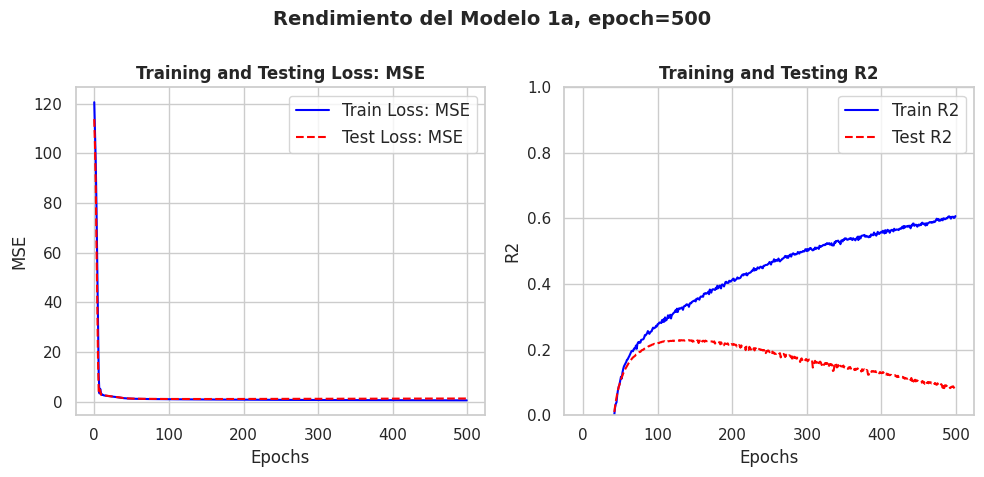

In [ ]:
graficar(reg_historia1a, nombre="Rendimiento del Modelo 1a, epoch=500")

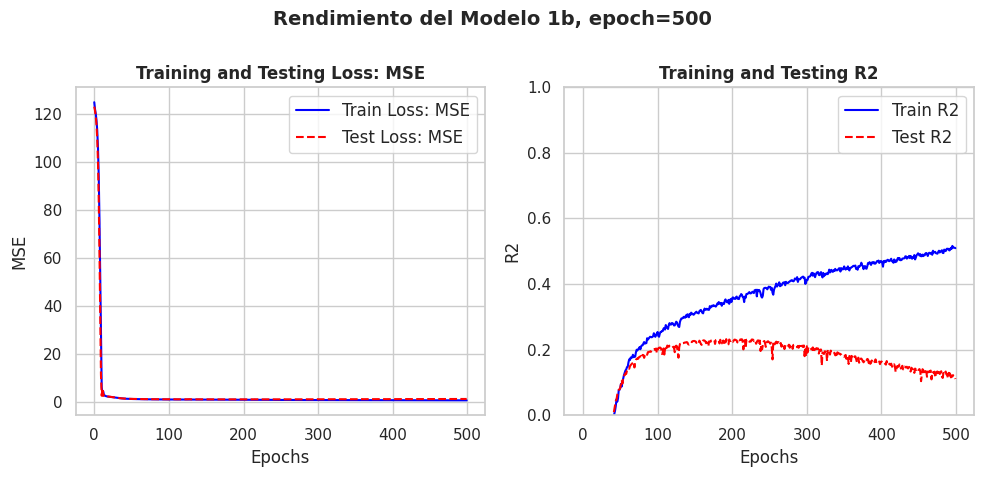

In [ ]:
graficar(reg_historia1b, nombre="Rendimiento del Modelo 1b, epoch=500")

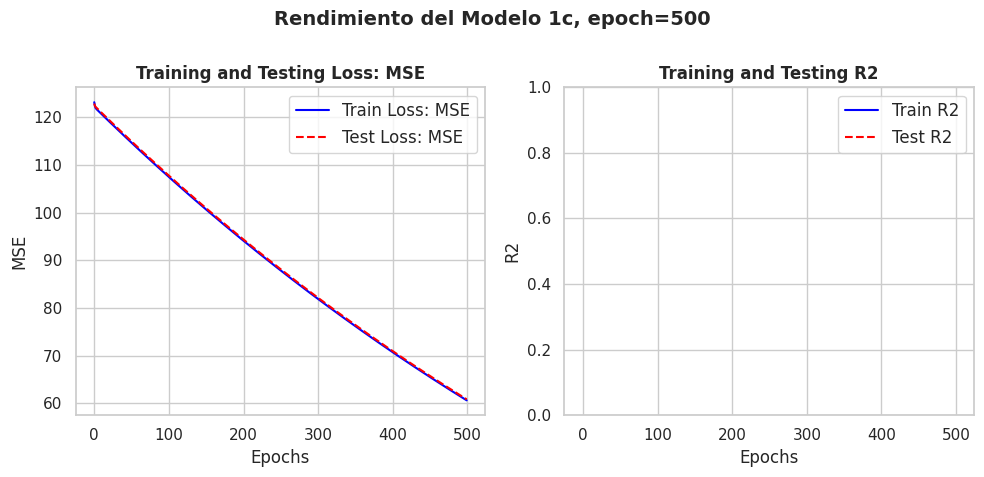

In [ ]:
graficar(reg_historia1c, nombre="Rendimiento del Modelo 1c, epoch=500")

<div style="text-align: left; margin-top: 2rem;">
  <button style="padding: 10px 20px; font-size: 12px; cursor: pointer; background-color: #f0f0f0; color: white; border: none;">
    <a href="#indice" style="color: black; text-decoration: none;">Regresar Tabla de contenido</a><br>
  </button>
</div>

### Modelo 2

Se crea y se diseña el Modelo 2:

In [ ]:
def diseñar_modelo_dropout(dim_entrada, capas, nombre):

    modelo = Sequential()

    modelo.add(Dense(capas[0], activation='relu', input_shape=(dim_entrada,), name='capa_1'))

    modelo.add(Dropout(.5))

    if len(capas)>1:
        i = 1
        while i < len(capas):
            modelo.add(Dense(capas[i], activation='relu', name='capa_'+str(i+1)))
            modelo.add(Dropout(.5))
            i += 1

    modelo.add(Dense(1, activation='linear', name='capa_salida'))

    modelo._name = nombre
    modelo.summary()

    return modelo

In [ ]:
dim_entrada = 104
capas2a = [52, 26, 13]
capas2b = [52, 26, 13, 7]
capas2c = [52, 26, 13, 7, 4]

reg_modelo2a = diseñar_modelo_dropout(dim_entrada, capas2a, 'reg_modelo_2a')
reg_modelo2b = diseñar_modelo_dropout(dim_entrada, capas2b, 'reg_modelo_2b')
reg_modelo2c = diseñar_modelo_dropout(dim_entrada, capas2c, 'reg_modelo_2c')

Model: "reg_modelo_2a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 52)                5460      
                                                                 
 dropout_87 (Dropout)        (None, 52)                0         
                                                                 
 capa_2 (Dense)              (None, 26)                1378      
                                                                 
 dropout_88 (Dropout)        (None, 26)                0         
                                                                 
 capa_3 (Dense)              (None, 13)                351       
                                                                 
 dropout_89 (Dropout)        (None, 13)                0         
                                                                 
 capa_salida (Dense)         (None, 1)               

Se compila el modelo:

In [ ]:
reg_modelo2a.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

reg_modelo2b.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

reg_modelo2c.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 500
reg_historia2a = reg_modelo2a.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 13s 2s/step - loss: 122.4944 - r_squared: -89.4239 - val_loss: 112.9970 - val_r_squared: -81.0706
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 110.1680 - r_squared: -80.8957 - val_loss: 101.3591 - val_r_squared: -72.6207
Epoch 3/500
7/7 [==============================] - 0s 13ms/step - loss: 96.4474 - r_squared: -70.3068 - val_loss: 82.0563 - val_r_squared: -58.5980
Epoch 4/500
7/7 [==============================] - 0s 14ms/step - loss: 79.1883 - r_squared: -56.8950 - val_loss: 55.8932 - val_r_squared: -39.5890
Epoch 5/500
7/7 [==============================] - 0s 14ms/step - loss: 62.6100 - r_squared: -45.3640 - val_loss: 28.7844 - val_r_squared: -19.9004
Epoch 6/500
7/7 [==============================] - 0s 13ms/step - loss: 51.6650 - r_squared: -37.3396 - val_loss: 12.4588 - val_r_squared: -8.0443
Epoch 7/500
7/7 [==============================] - 0s 14ms/step - loss: 49.6975 - r_squared: -36.1908 - val_lo

In [ ]:
nepochs = 500
reg_historia2b = reg_modelo2b.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 9s 1s/step - loss: 114.5965 - r_squared: -84.1484 - val_loss: 119.1286 - val_r_squared: -85.5239
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 106.0762 - r_squared: -77.4118 - val_loss: 114.3708 - val_r_squared: -82.0731
Epoch 3/500
7/7 [==============================] - 0s 14ms/step - loss: 96.9897 - r_squared: -70.7502 - val_loss: 105.0331 - val_r_squared: -75.2961
Epoch 4/500
7/7 [==============================] - 0s 14ms/step - loss: 84.0645 - r_squared: -61.9214 - val_loss: 86.9238 - val_r_squared: -62.1450
Epoch 5/500
7/7 [==============================] - 0s 11ms/step - loss: 73.3484 - r_squared: -53.5434 - val_loss: 60.9436 - val_r_squared: -43.2751
Epoch 6/500
7/7 [==============================] - 0s 14ms/step - loss: 72.3406 - r_squared: -53.9353 - val_loss: 48.7765 - val_r_squared: -34.4350
Epoch 7/500
7/7 [==============================] - 0s 15ms/step - loss: 70.1609 - r_squared: -51.5599 - val_l

In [ ]:
nepochs = 500
reg_historia2c = reg_modelo2c.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 11s 2s/step - loss: 128.3051 - r_squared: -93.8111 - val_loss: 122.4628 - val_r_squared: -87.9442
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 124.4666 - r_squared: -92.0443 - val_loss: 121.8020 - val_r_squared: -87.4629
Epoch 3/500
7/7 [==============================] - 0s 12ms/step - loss: 122.8008 - r_squared: -89.6936 - val_loss: 121.3908 - val_r_squared: -87.1639
Epoch 4/500
7/7 [==============================] - 0s 15ms/step - loss: 121.6798 - r_squared: -90.1362 - val_loss: 120.9764 - val_r_squared: -86.8628
Epoch 5/500
7/7 [==============================] - 0s 12ms/step - loss: 120.7485 - r_squared: -89.5792 - val_loss: 120.4650 - val_r_squared: -86.4913
Epoch 6/500
7/7 [==============================] - 0s 14ms/step - loss: 120.1457 - r_squared: -88.7446 - val_loss: 119.7900 - val_r_squared: -86.0012
Epoch 7/500
7/7 [==============================] - 0s 13ms/step - loss: 119.4614 - r_squared: -87.668

Pérdida de entrenamiento y prueba, y la evolución de la precisión a lo largo de las épocas:

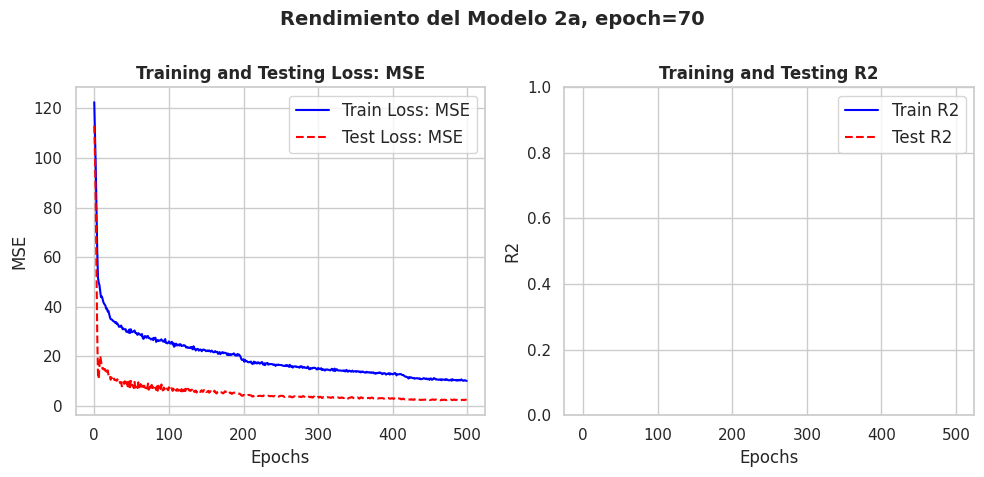

In [ ]:
graficar(reg_historia2a, nombre="Rendimiento del Modelo 2a, epoch=70")

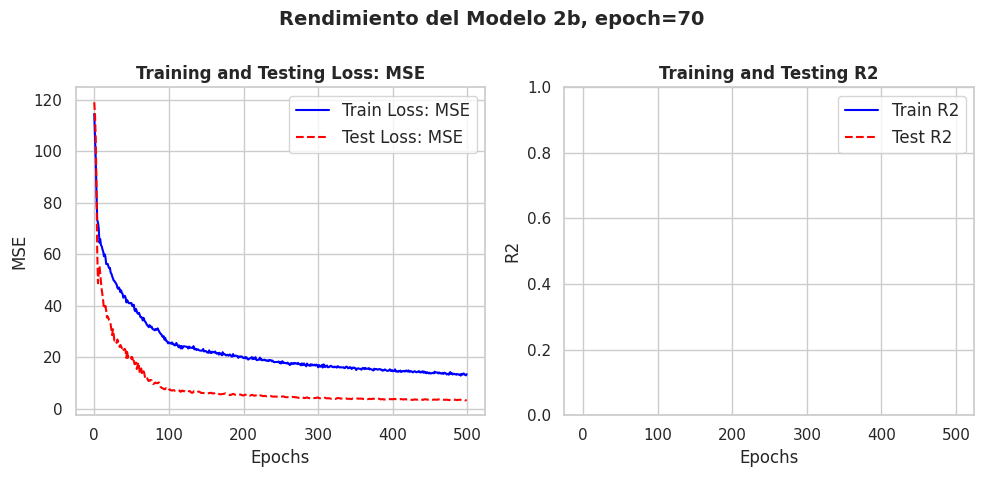

In [ ]:
graficar(reg_historia2b, nombre="Rendimiento del Modelo 2b, epoch=70")

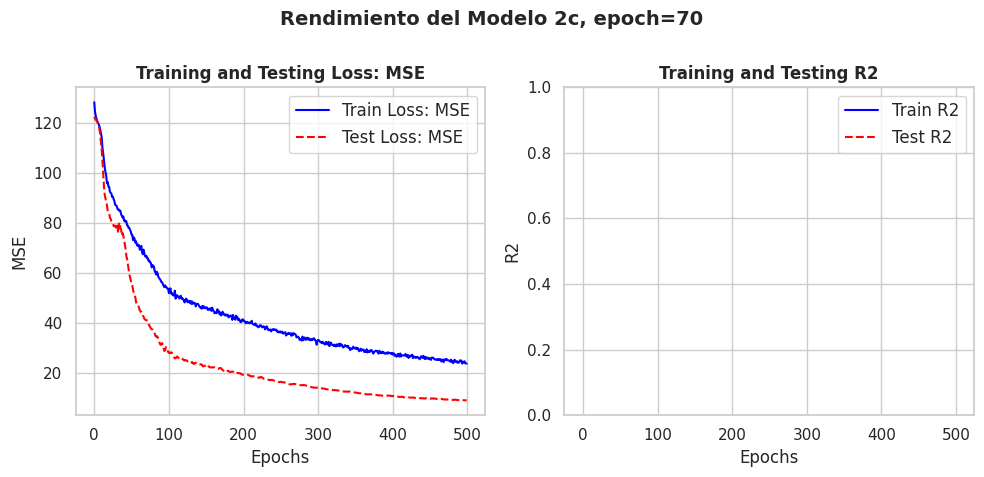

In [ ]:
graficar(reg_historia2c, nombre="Rendimiento del Modelo 2c, epoch=70")

### Modelo 3

Se crea y se diseña el Modelo 3:

In [ ]:
def diseñar_modelo_reg(dim_entrada, capas, nombre):

    modelo = Sequential()

    modelo.add(Dense(capas[0], activation='relu', input_shape=(dim_entrada,),
                     name='capa_1'))
    modelo.add(Dropout(.5))
    modelo.add(BatchNormalization())

    if len(capas)>1:
        i = 1
        while i < len(capas):
            modelo.add(Dense(capas[i], activation='relu', name='capa_'+str(i+1)))
            modelo.add(Dropout(.5))
            modelo.add(BatchNormalization())
            i += 1

    modelo.add(Dense(1, activation='linear', name='capa_salida'))

    modelo._name = nombre
    modelo.summary()

    return modelo

In [ ]:
dim_entrada = 104
capas3a = [52, 26, 13]
capas3b = [52, 26, 13, 7]
capas3c = [52, 26, 13, 7 , 4]

reg_modelo3a = diseñar_modelo_reg(dim_entrada, capas3a, 'reg_modelo_3a')
reg_modelo3b = diseñar_modelo_reg(dim_entrada, capas3b, 'reg_modelo_3b')
reg_modelo3c = diseñar_modelo_reg(dim_entrada, capas3c, 'reg_modelo_3c')

Model: "reg_modelo_3a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 52)                5460      
                                                                 
 dropout_99 (Dropout)        (None, 52)                0         
                                                                 
 batch_normalization_30 (Ba  (None, 52)                208       
 tchNormalization)                                               
                                                                 
 capa_2 (Dense)              (None, 26)                1378      
                                                                 
 dropout_100 (Dropout)       (None, 26)                0         
                                                                 
 batch_normalization_31 (Ba  (None, 26)                104       
 tchNormalization)                                   

Se compila el modelo:

In [ ]:
reg_modelo3a.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

reg_modelo3b.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

reg_modelo3c.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 500
reg_historia3a = reg_modelo3a.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 12s 2s/step - loss: 123.3859 - r_squared: -90.9441 - val_loss: 111.8756 - val_r_squared: -80.2497
Epoch 2/500
7/7 [==============================] - 0s 14ms/step - loss: 122.5270 - r_squared: -91.4988 - val_loss: 113.3827 - val_r_squared: -81.3432
Epoch 3/500
7/7 [==============================] - 0s 17ms/step - loss: 121.5888 - r_squared: -89.6145 - val_loss: 114.6201 - val_r_squared: -82.2412
Epoch 4/500
7/7 [==============================] - 0s 13ms/step - loss: 120.7934 - r_squared: -88.2447 - val_loss: 115.4604 - val_r_squared: -82.8513
Epoch 5/500
7/7 [==============================] - 0s 15ms/step - loss: 120.0376 - r_squared: -89.1593 - val_loss: 115.9924 - val_r_squared: -83.2377
Epoch 6/500
7/7 [==============================] - 0s 16ms/step - loss: 119.2603 - r_squared: -89.4242 - val_loss: 116.4082 - val_r_squared: -83.5395
Epoch 7/500
7/7 [==============================] - 0s 14ms/step - loss: 118.3476 - r_squared: -87.931

In [ ]:
nepochs = 500
reg_historia3b = reg_modelo3b.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=10
                                  00, verbose=1)

Epoch 1/500
7/7 [==============================] - 12s 2s/step - loss: 124.2756 - r_squared: -91.2088 - val_loss: 120.5080 - val_r_squared: -86.5279
Epoch 2/500
7/7 [==============================] - 0s 16ms/step - loss: 123.4918 - r_squared: -91.4198 - val_loss: 120.9222 - val_r_squared: -86.8284
Epoch 3/500
7/7 [==============================] - 0s 17ms/step - loss: 122.7356 - r_squared: -90.3949 - val_loss: 120.6114 - val_r_squared: -86.5999
Epoch 4/500
7/7 [==============================] - 0s 15ms/step - loss: 122.0002 - r_squared: -89.8403 - val_loss: 119.8781 - val_r_squared: -86.0635
Epoch 5/500
7/7 [==============================] - 0s 15ms/step - loss: 121.2958 - r_squared: -89.1220 - val_loss: 118.8348 - val_r_squared: -85.3033
Epoch 6/500
7/7 [==============================] - 0s 15ms/step - loss: 120.6315 - r_squared: -88.7766 - val_loss: 117.8890 - val_r_squared: -84.6145
Epoch 7/500
7/7 [==============================] - 0s 17ms/step - loss: 120.1120 - r_squared: -87.987

In [ ]:
nepochs = 500
reg_historia3c = reg_modelo3c.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=320, verbose=1)

Epoch 1/500
21/21 [==============================] - 10s 385ms/step - loss: 122.5071 - r_squared: -90.5660 - val_loss: 113.3654 - val_r_squared: -82.3779
Epoch 2/500
21/21 [==============================] - 0s 7ms/step - loss: 120.1491 - r_squared: -89.3300 - val_loss: 113.7186 - val_r_squared: -82.6358
Epoch 3/500
21/21 [==============================] - 0s 7ms/step - loss: 117.7392 - r_squared: -87.5481 - val_loss: 112.3554 - val_r_squared: -81.6307
Epoch 4/500
21/21 [==============================] - 0s 10ms/step - loss: 115.0556 - r_squared: -85.3490 - val_loss: 111.0169 - val_r_squared: -80.6433
Epoch 5/500
21/21 [==============================] - 0s 7ms/step - loss: 111.9846 - r_squared: -83.1827 - val_loss: 108.8852 - val_r_squared: -79.0744
Epoch 6/500
21/21 [==============================] - 0s 7ms/step - loss: 108.2313 - r_squared: -80.6715 - val_loss: 105.7459 - val_r_squared: -76.7671
Epoch 7/500
21/21 [==============================] - 0s 7ms/step - loss: 104.1422 - r_squa

Pérdida de entrenamiento y validación, y la evolución de la precisión a lo largo de las épocas:

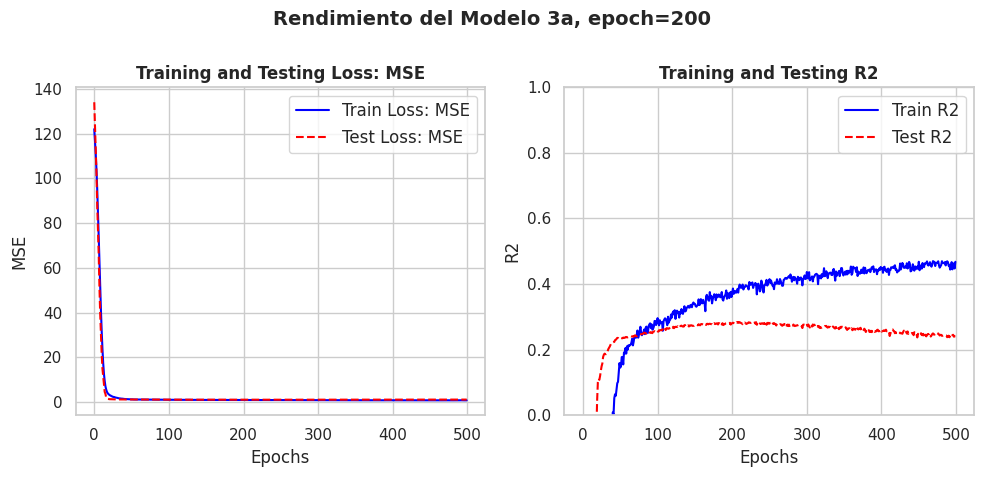

In [ ]:
graficar(reg_historia3a, nombre="Rendimiento del Modelo 3a, epoch=200")

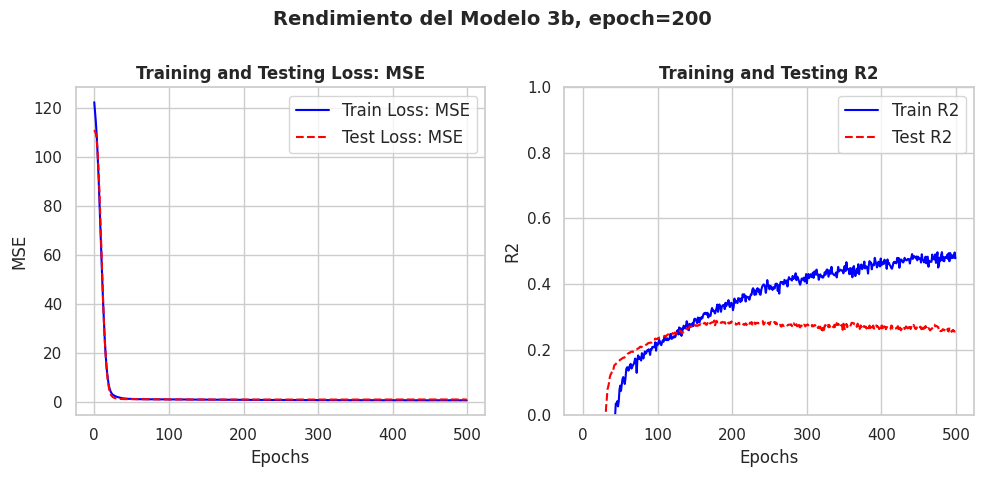

In [ ]:
graficar(reg_historia3b, nombre="Rendimiento del Modelo 3b, epoch=200")

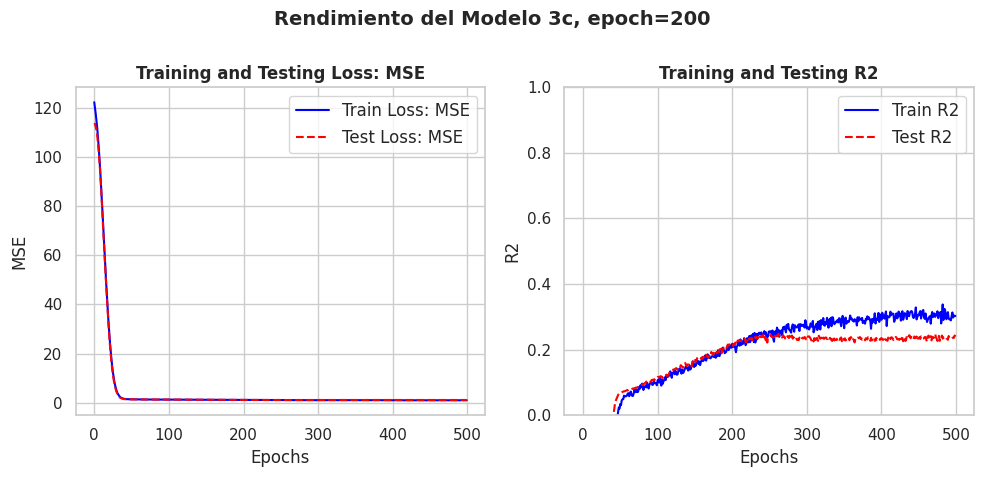

In [ ]:
graficar(reg_historia3c, nombre="Rendimiento del Modelo 3c, epoch=200")

### 7.1.1. Con las características más relacionadas

In [ ]:
y1_filtro_train.shape

(6443,)

In [ ]:
X1_filtro_train.shape

(6443, 92)

### Modelo 1

Se crea y se diseña el Modelo 1 pasándole los siguientes parámetros a la función 'diseño_modelo' definida anteriormente:

In [ ]:
dim_entrada = 92
capas1a = [46]
capas1b = [46, 23]
capas1c = [46, 23, 12]

reg_modelo1a = diseñar_modelo(dim_entrada, capas1a, 'reg_modelo_1a')
reg_modelo1b = diseñar_modelo(dim_entrada, capas1b, 'reg_modelo_1b')
reg_modelo1c = diseñar_modelo(dim_entrada, capas1c, 'reg_modelo_1c')

Model: "reg_modelo_1a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 46)                4278      
                                                                 
 capa_salida (Dense)         (None, 1)                 47        
                                                                 
Total params: 4325 (16.89 KB)
Trainable params: 4325 (16.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "reg_modelo_1b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 46)                4278      
                                                                 
 capa_2 (Dense)              (None, 23)                1081      
                                                              

Se compilarán los modelos usando el optimizador "adam", la función de pérdida 'binary_crossentropy' y la métrica de evaluación del rendimiento del modelo durante el entrenamiento y la validación es el 'accuracy':

In [ ]:
import keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
reg_modelo1a.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

reg_modelo1b.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

reg_modelo1c.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 500
reg_historia1a = reg_modelo1a.fit(X1_filtro_train, y1_filtro_train, epochs=nepochs, validation_data=(X1_filtro_test, y1_filtro_test), batch_size=320, verbose=1)

Epoch 1/500
21/21 [==============================] - 10s 463ms/step - loss: 103.8963 - r_squared: -76.9066 - val_loss: 75.8390 - val_r_squared: -54.7665
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 53.8573 - r_squared: -39.0349 - val_loss: 29.6658 - val_r_squared: -20.8086
Epoch 3/500
21/21 [==============================] - 0s 6ms/step - loss: 16.4333 - r_squared: -11.0803 - val_loss: 5.7125 - val_r_squared: -3.1959
Epoch 4/500
21/21 [==============================] - 0s 4ms/step - loss: 3.4619 - r_squared: -1.5779 - val_loss: 2.6432 - val_r_squared: -0.9407
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 2.6484 - r_squared: -0.9809 - val_loss: 2.6153 - val_r_squared: -0.9201
Epoch 6/500
21/21 [==============================] - 0s 4ms/step - loss: 2.5038 - r_squared: -0.8669 - val_loss: 2.4772 - val_r_squared: -0.8180
Epoch 7/500
21/21 [==============================] - 0s 4ms/step - loss: 2.4270 - r_squared: -0.8881 - val_loss: 2.4

In [ ]:
nepochs = 500
reg_historia1b = reg_modelo1b.fit(X1_filtro_train, y1_filtro_train, epochs=nepochs, validation_data=(X1_filtro_test, y1_filtro_test), batch_size=320, verbose=1)

Epoch 1/500
21/21 [==============================] - 16s 741ms/step - loss: 93.1848 - r_squared: -70.3933 - val_loss: 64.2751 - val_r_squared: -46.2700
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 36.5873 - r_squared: -25.7031 - val_loss: 8.3495 - val_r_squared: -5.1327
Epoch 3/500
21/21 [==============================] - 0s 4ms/step - loss: 3.8768 - r_squared: -1.9529 - val_loss: 3.5398 - val_r_squared: -1.5883
Epoch 4/500
21/21 [==============================] - 0s 5ms/step - loss: 2.6572 - r_squared: -0.9994 - val_loss: 2.3969 - val_r_squared: -0.7511
Epoch 5/500
21/21 [==============================] - 0s 5ms/step - loss: 2.2745 - r_squared: -0.7218 - val_loss: 2.2096 - val_r_squared: -0.6130
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 2.1456 - r_squared: -0.6084 - val_loss: 2.0688 - val_r_squared: -0.5097
Epoch 7/500
21/21 [==============================] - 0s 5ms/step - loss: 2.0007 - r_squared: -0.5130 - val_loss: 1.9213 -

In [ ]:
nepochs = 500
reg_historia1c = reg_modelo1c.fit(X1_filtro_train, y1_filtro_train, epochs=nepochs, validation_data=(X1_filtro_test, y1_filtro_test), batch_size=320, verbose=1)

Epoch 1/500
21/21 [==============================] - 10s 436ms/step - loss: 112.0973 - r_squared: -83.4329 - val_loss: 98.8362 - val_r_squared: -71.6734
Epoch 2/500
21/21 [==============================] - 0s 5ms/step - loss: 79.7354 - r_squared: -57.9835 - val_loss: 50.8038 - val_r_squared: -36.3497
Epoch 3/500
21/21 [==============================] - 0s 5ms/step - loss: 22.7243 - r_squared: -15.1829 - val_loss: 2.6200 - val_r_squared: -0.9172
Epoch 4/500
21/21 [==============================] - 0s 4ms/step - loss: 3.5670 - r_squared: -1.6264 - val_loss: 2.4906 - val_r_squared: -0.8223
Epoch 5/500
21/21 [==============================] - 0s 7ms/step - loss: 2.4979 - r_squared: -0.8781 - val_loss: 2.3868 - val_r_squared: -0.7460
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 2.2989 - r_squared: -0.7069 - val_loss: 2.2696 - val_r_squared: -0.6601
Epoch 7/500
21/21 [==============================] - 0s 5ms/step - loss: 2.1822 - r_squared: -0.6664 - val_loss: 2.1

El siguiente gráfico nos permite visualizar la pérdida de entrenamiento y prueba, y la evolución de la precisión a lo largo de las épocas utilizando el historial de cada modelo:

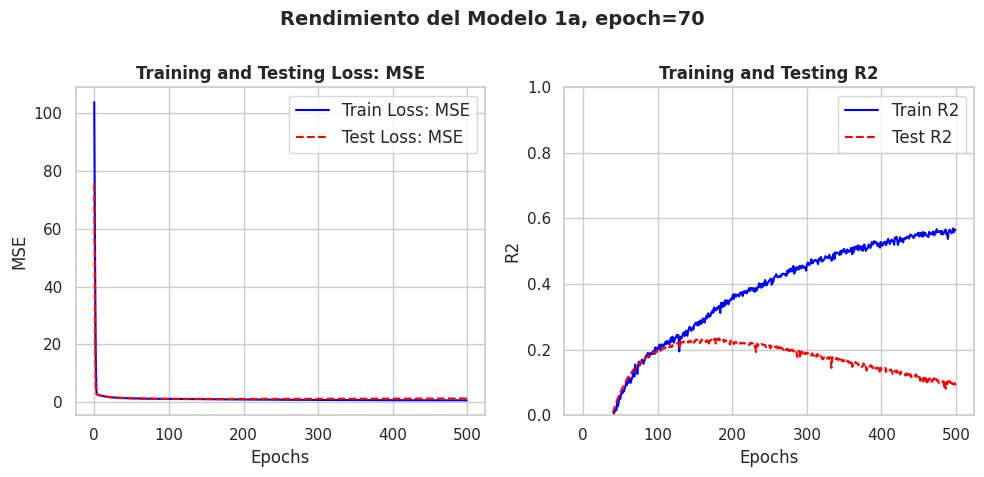

In [ ]:
graficar(reg_historia1a, nombre="Rendimiento del Modelo 1a, epoch=70")

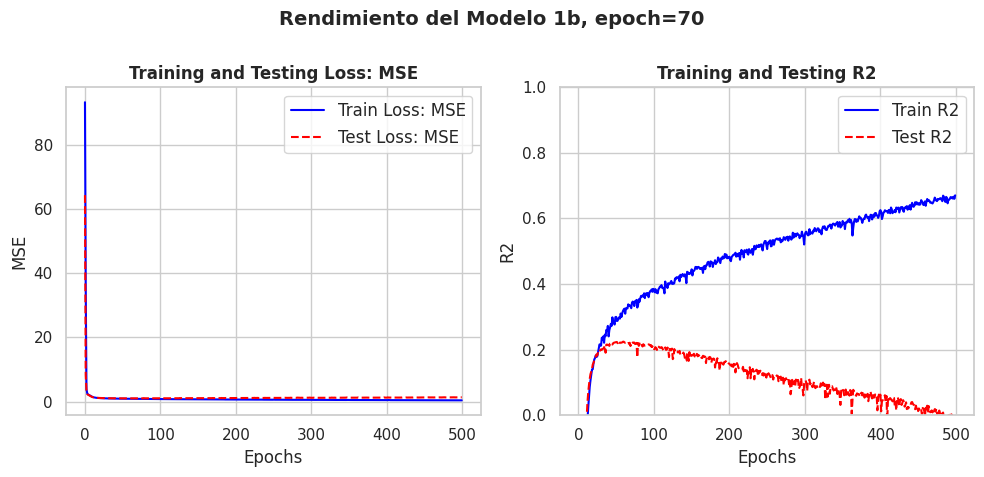

In [ ]:
graficar(reg_historia1b, nombre="Rendimiento del Modelo 1b, epoch=70")

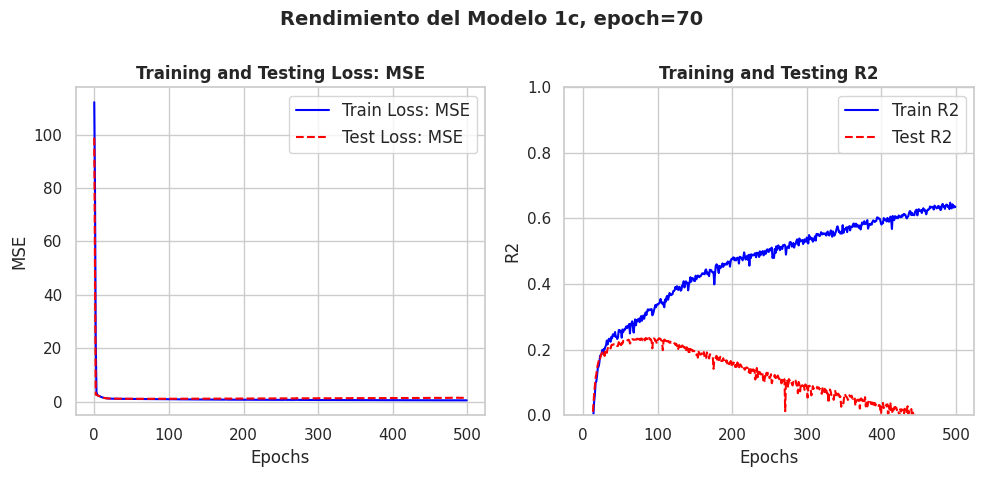

In [ ]:
graficar(reg_historia1c, nombre="Rendimiento del Modelo 1c, epoch=70")

<div style="text-align: left; margin-top: 2rem;">
  <button style="padding: 10px 20px; font-size: 12px; cursor: pointer; background-color: #f0f0f0; color: white; border: none;">
    <a href="#indice" style="color: black; text-decoration: none;">Regresar Tabla de contenido</a><br>
  </button>
</div>

### Modelo 2

Se crea y se diseña el Modelo 2:

In [ ]:
def diseñar_modelo_dropout(dim_entrada, capas, nombre):

    modelo = Sequential()

    modelo.add(Dense(capas[0], activation='relu', input_shape=(dim_entrada,), name='capa_1'))

    modelo.add(Dropout(.5))

    if len(capas)>1:
        i = 1
        while i < len(capas):
            modelo.add(Dense(capas[i], activation='relu', name='capa_'+str(i+1)))
            modelo.add(Dropout(.5))
            i += 1

    modelo.add(Dense(1, activation='linear', name='capa_salida'))

    modelo._name = nombre
    modelo.summary()

    return modelo

In [ ]:
dim_entrada = 92
capas2a = [46]
capas2b = [46, 23]
capas2c = [46, 23, 15]

reg_modelo2a = diseñar_modelo_dropout(dim_entrada, capas2a, 'reg_modelo_2a')
reg_modelo2b = diseñar_modelo_dropout(dim_entrada, capas2b, 'reg_modelo_2b')
reg_modelo2c = diseñar_modelo_dropout(dim_entrada, capas2c, 'reg_modelo_2c')

Model: "reg_modelo_2a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 46)                4278      
                                                                 
 dropout_69 (Dropout)        (None, 46)                0         
                                                                 
 capa_salida (Dense)         (None, 1)                 47        
                                                                 
Total params: 4325 (16.89 KB)
Trainable params: 4325 (16.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "reg_modelo_2b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 46)                4278      
                                                              

Se compila el modelo:

In [ ]:
reg_modelo2a.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

reg_modelo2b.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

reg_modelo2c.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=[r_squared])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 500
reg_historia2a = reg_modelo2a.fit(X1_filtro_train, y1_filtro_train, epochs=nepochs, validation_data=(X1_filtro_test, y1_filtro_test), batch_size=320, verbose=1)

Epoch 1/500
21/21 [==============================] - 10s 452ms/step - loss: 104.5426 - r_squared: -77.1837 - val_loss: 76.9063 - val_r_squared: -55.5495
Epoch 2/500
21/21 [==============================] - 0s 5ms/step - loss: 54.3200 - r_squared: -39.2339 - val_loss: 27.6880 - val_r_squared: -19.3625
Epoch 3/500
21/21 [==============================] - 0s 5ms/step - loss: 17.7893 - r_squared: -12.2009 - val_loss: 5.1127 - val_r_squared: -2.7601
Epoch 4/500
21/21 [==============================] - 0s 5ms/step - loss: 8.6413 - r_squared: -5.4181 - val_loss: 2.7747 - val_r_squared: -1.0394
Epoch 5/500
21/21 [==============================] - 0s 6ms/step - loss: 8.2765 - r_squared: -5.2587 - val_loss: 2.7233 - val_r_squared: -1.0013
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 7.7368 - r_squared: -4.8077 - val_loss: 2.7515 - val_r_squared: -1.0218
Epoch 7/500
21/21 [==============================] - 0s 4ms/step - loss: 7.6599 - r_squared: -4.6912 - val_loss: 2.6

In [ ]:
nepochs = 500
reg_historia2b = reg_modelo2b.fit(X1_filtro_train, y1_filtro_train, epochs=nepochs, validation_data=(X1_filtro_test, y1_filtro_test), batch_size=320, verbose=1)

Epoch 1/500
21/21 [==============================] - 11s 496ms/step - loss: 101.7710 - r_squared: -75.4114 - val_loss: 76.3773 - val_r_squared: -55.2049
Epoch 2/500
21/21 [==============================] - 0s 5ms/step - loss: 49.2655 - r_squared: -35.1326 - val_loss: 10.4029 - val_r_squared: -6.6524
Epoch 3/500
21/21 [==============================] - 0s 5ms/step - loss: 22.8500 - r_squared: -15.8075 - val_loss: 3.1926 - val_r_squared: -1.3378
Epoch 4/500
21/21 [==============================] - 0s 5ms/step - loss: 20.7026 - r_squared: -14.6466 - val_loss: 4.6098 - val_r_squared: -2.3844
Epoch 5/500
21/21 [==============================] - 0s 5ms/step - loss: 19.2466 - r_squared: -13.2423 - val_loss: 3.7532 - val_r_squared: -1.7510
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 17.9021 - r_squared: -12.3035 - val_loss: 3.3622 - val_r_squared: -1.4630
Epoch 7/500
21/21 [==============================] - 0s 5ms/step - loss: 17.2573 - r_squared: -11.9442 - val_lo

In [ ]:
nepochs = 500
reg_historia2c = reg_modelo2c.fit(X1_train, y1_train, epochs=nepochs, validation_data=(X1_test, y1_test), batch_size=320, verbose=1)

Epoch 1/500
21/21 [==============================] - 11s 538ms/step - loss: 30.0889 - r_squared: -21.7135 - val_loss: 8.6787 - val_r_squared: -5.3710
Epoch 2/500
21/21 [==============================] - 0s 6ms/step - loss: 29.5909 - r_squared: -21.5264 - val_loss: 10.4252 - val_r_squared: -6.6548
Epoch 3/500
21/21 [==============================] - 0s 6ms/step - loss: 28.7714 - r_squared: -20.9468 - val_loss: 10.2794 - val_r_squared: -6.5459
Epoch 4/500
21/21 [==============================] - 0s 6ms/step - loss: 28.1640 - r_squared: -20.3703 - val_loss: 9.0672 - val_r_squared: -5.6523
Epoch 5/500
21/21 [==============================] - 0s 6ms/step - loss: 27.6859 - r_squared: -21.4321 - val_loss: 9.1235 - val_r_squared: -5.6934
Epoch 6/500
21/21 [==============================] - 0s 6ms/step - loss: 27.9047 - r_squared: -20.3538 - val_loss: 8.6058 - val_r_squared: -5.3131
Epoch 7/500
21/21 [==============================] - 0s 6ms/step - loss: 27.6287 - r_squared: -20.5871 - val_loss

Pérdida de entrenamiento y prueba, y la evolución de la precisión a lo largo de las épocas:

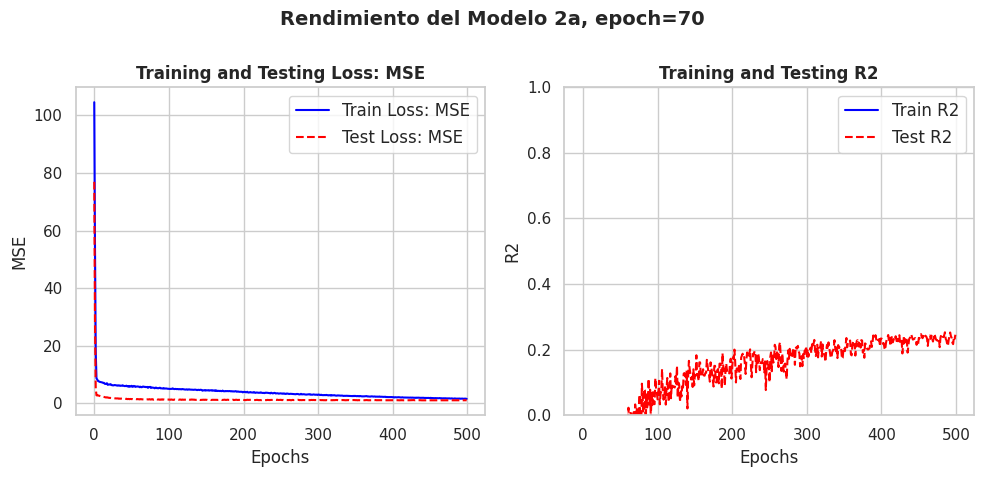

In [ ]:
graficar(reg_historia2a, nombre="Rendimiento del Modelo 2a, epoch=70")

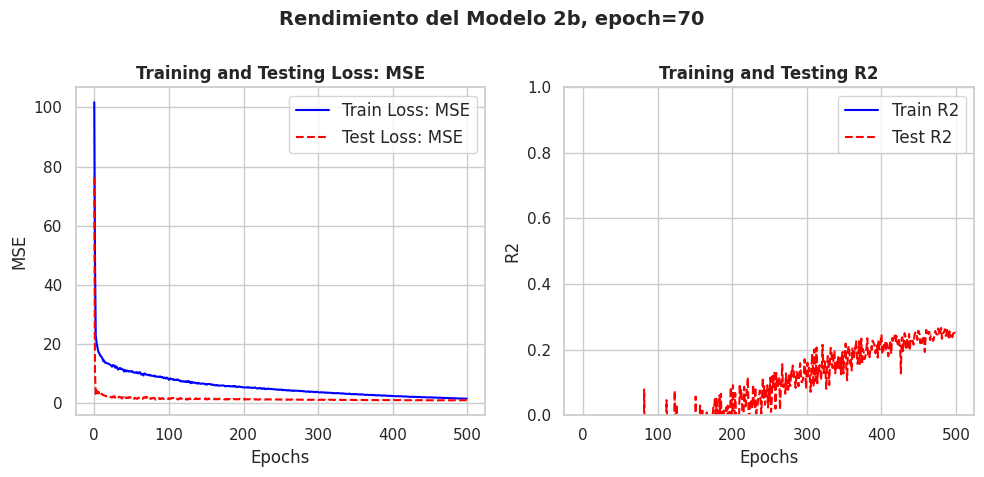

In [ ]:
graficar(reg_historia2b, nombre="Rendimiento del Modelo 2b, epoch=70")

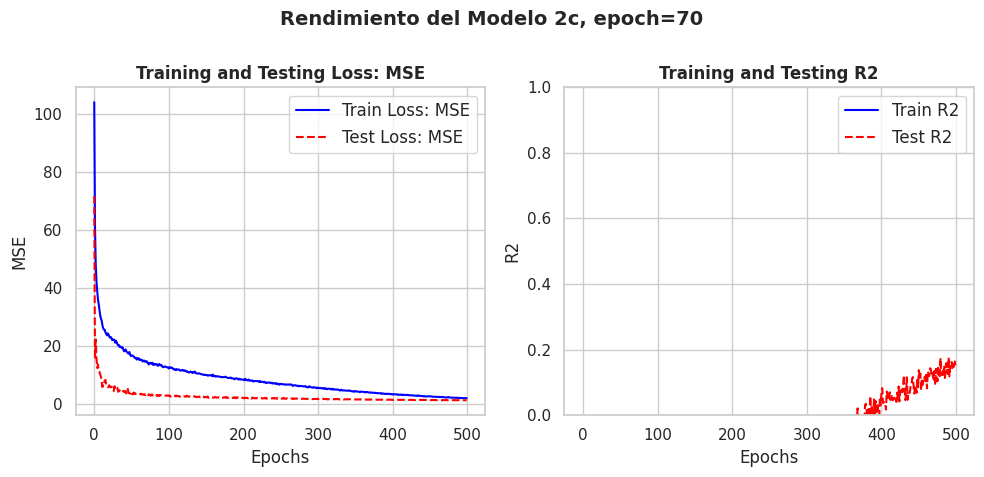

In [ ]:
graficar(reg_historia2c, nombre="Rendimiento del Modelo 2c, epoch=70")

### Modelo 3

Se crea y se diseña el Modelo 3:

In [ ]:
def diseñar_modelo_reg(dim_entrada, capas, nombre):

    modelo = Sequential()

    modelo.add(Dense(capas[0], activation='relu', input_shape=(dim_entrada,),
                     name='capa_1'))
    modelo.add(Dropout(.5))
    modelo.add(BatchNormalization())

    if len(capas)>1:
        i = 1
        while i < len(capas):
            modelo.add(Dense(capas[i], activation='relu', name='capa_'+str(i+1)))
            modelo.add(Dropout(.5))
            modelo.add(BatchNormalization())
            i += 1

    modelo.add(Dense(1, activation='linear', name='capa_salida'))

    modelo._name = nombre
    modelo.summary()

    return modelo

In [ ]:
dim_entrada = 92
capas3a = [46, 30, 15]
capas3b = [46, 30, 15, 8]
capas3c = [59, 30, 15, 8, 4]

reg_modelo3a = diseñar_modelo_reg(dim_entrada, capas3a, 'reg_modelo_3a')
reg_modelo3b = diseñar_modelo_reg(dim_entrada, capas3b, 'reg_modelo_3b')
reg_modelo3c = diseñar_modelo_reg(dim_entrada, capas3c, 'reg_modelo_3c')

Model: "reg_modelo_3a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa_1 (Dense)              (None, 46)                4278      
                                                                 
 dropout_75 (Dropout)        (None, 46)                0         
                                                                 
 batch_normalization_18 (Ba  (None, 46)                184       
 tchNormalization)                                               
                                                                 
 capa_2 (Dense)              (None, 30)                1410      
                                                                 
 dropout_76 (Dropout)        (None, 30)                0         
                                                                 
 batch_normalization_19 (Ba  (None, 30)                120       
 tchNormalization)                                   

Se compila el modelo:

In [ ]:
reg_modelo3a.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

reg_modelo3b.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

reg_modelo3c.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

Se entrena el modelo con 70 épocas:

In [ ]:
nepochs = 500
reg_historia3a = reg_modelo3a.fit(X1_filtro_train, y1_filtro_train, epochs=nepochs, validation_data=(X1_filtro_test, y1_filtro_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 11s 1s/step - loss: 123.9747 - r_squared: -90.9674 - val_loss: 117.3458 - val_r_squared: -84.2283
Epoch 2/500
7/7 [==============================] - 0s 16ms/step - loss: 122.8380 - r_squared: -90.9941 - val_loss: 117.0720 - val_r_squared: -84.0281
Epoch 3/500
7/7 [==============================] - 0s 14ms/step - loss: 121.6482 - r_squared: -90.0696 - val_loss: 116.6087 - val_r_squared: -83.6907
Epoch 4/500
7/7 [==============================] - 0s 15ms/step - loss: 120.7285 - r_squared: -89.8792 - val_loss: 116.0741 - val_r_squared: -83.3016
Epoch 5/500
7/7 [==============================] - 0s 14ms/step - loss: 119.7230 - r_squared: -89.3020 - val_loss: 115.5570 - val_r_squared: -82.9256
Epoch 6/500
7/7 [==============================] - 0s 15ms/step - loss: 118.7807 - r_squared: -86.8622 - val_loss: 115.1370 - val_r_squared: -82.6199
Epoch 7/500
7/7 [==============================] - 0s 15ms/step - loss: 117.8165 - r_squared: -87.211

In [ ]:
nepochs = 500
reg_historia3b = reg_modelo3b.fit(X1_filtro_train, y1_filtro_train, epochs=nepochs, validation_data=(X1_filtro_test, y1_filtro_test), batch_size=1000, verbose=1)

Epoch 1/500
7/7 [==============================] - 11s 1s/step - loss: 123.9464 - r_squared: -90.9266 - val_loss: 118.9632 - val_r_squared: -85.3897
Epoch 2/500
7/7 [==============================] - 0s 23ms/step - loss: 123.0559 - r_squared: -91.0115 - val_loss: 118.5544 - val_r_squared: -85.0952
Epoch 3/500
7/7 [==============================] - 0s 23ms/step - loss: 122.3242 - r_squared: -90.2246 - val_loss: 118.0065 - val_r_squared: -84.7001
Epoch 4/500
7/7 [==============================] - 0s 23ms/step - loss: 121.5983 - r_squared: -90.2847 - val_loss: 117.5678 - val_r_squared: -84.3844
Epoch 5/500
7/7 [==============================] - 0s 23ms/step - loss: 120.8139 - r_squared: -89.5859 - val_loss: 116.9898 - val_r_squared: -83.9661
Epoch 6/500
7/7 [==============================] - 0s 23ms/step - loss: 119.9984 - r_squared: -88.2634 - val_loss: 116.5779 - val_r_squared: -83.6677
Epoch 7/500
7/7 [==============================] - 0s 23ms/step - loss: 119.4284 - r_squared: -88.288

In [ ]:
nepochs = 1000
reg_historia3c = reg_modelo3c.fit(X1_filtro_train, y1_filtro_train, epochs=nepochs, validation_data=(X1_filtro_test, y1_filtro_test), batch_size=1000, verbose=1)

Epoch 1/1000
7/7 [==============================] - 12s 2s/step - loss: 124.0797 - r_squared: -90.9757 - val_loss: 113.2308 - val_r_squared: -81.2305
Epoch 2/1000
7/7 [==============================] - 0s 18ms/step - loss: 123.4187 - r_squared: -89.9012 - val_loss: 114.8200 - val_r_squared: -82.3854
Epoch 3/1000
7/7 [==============================] - 0s 19ms/step - loss: 122.8269 - r_squared: -90.4922 - val_loss: 116.0638 - val_r_squared: -83.2888
Epoch 4/1000
7/7 [==============================] - 0s 20ms/step - loss: 122.2552 - r_squared: -90.8194 - val_loss: 116.9661 - val_r_squared: -83.9438
Epoch 5/1000
7/7 [==============================] - 0s 21ms/step - loss: 121.7005 - r_squared: -89.0838 - val_loss: 117.8785 - val_r_squared: -84.6069
Epoch 6/1000
7/7 [==============================] - 0s 20ms/step - loss: 121.2133 - r_squared: -89.0125 - val_loss: 118.7648 - val_r_squared: -85.2505
Epoch 7/1000
7/7 [==============================] - 0s 20ms/step - loss: 120.7151 - r_squared: 

Pérdida de entrenamiento y validación, y la evolución de la precisión a lo largo de las épocas:

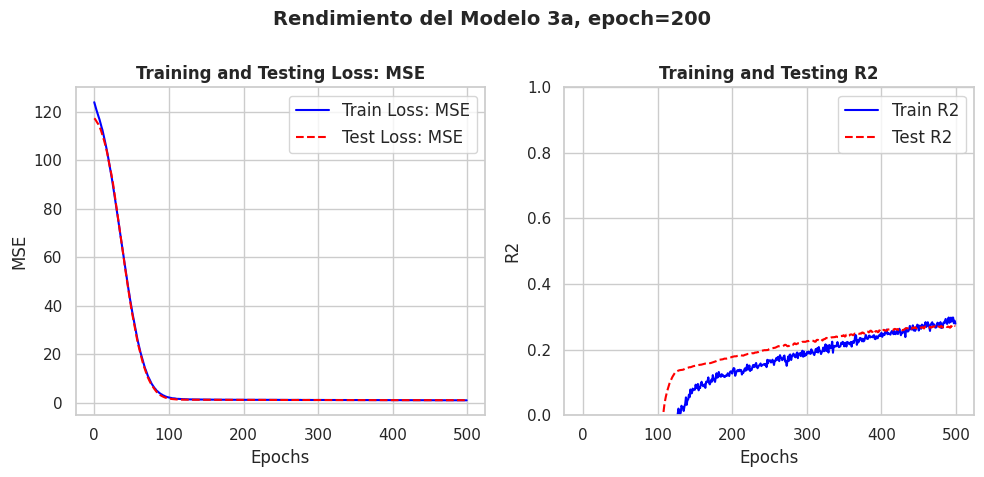

In [ ]:
graficar(reg_historia3a, nombre="Rendimiento del Modelo 3a, epoch=200")

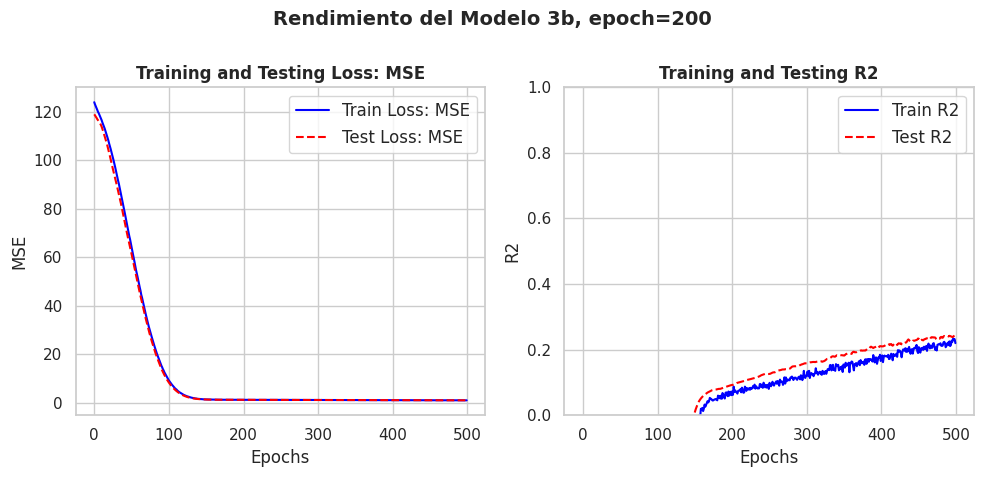

In [ ]:
graficar(reg_historia3b, nombre="Rendimiento del Modelo 3b, epoch=200")

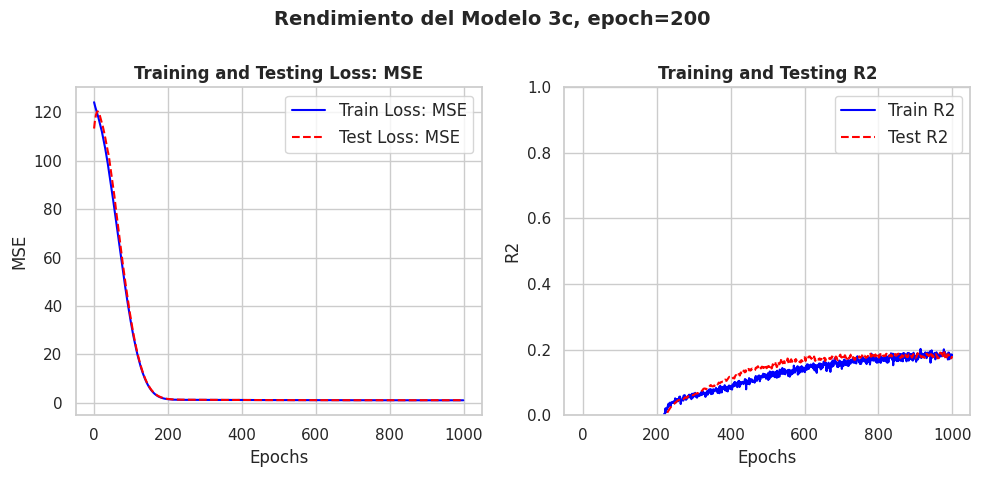

In [ ]:
graficar(reg_historia3c, nombre="Rendimiento del Modelo 3c, epoch=200")